In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
epoch = 3
path = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch{}/'.format(epoch)
wpath = '{}wfc3/'.format(path)
apath = '{}acs/'.format(path)

WFC3 first

In [4]:
drcs = glob.glob('{}*drc.fits'.format(wpath))
drcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05010_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05020_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05031_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05041_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05051_drc.fits']

In [5]:
flcs = glob.glob('{}*flc.fits'.format(wpath))
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits']

In [6]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05010_drc.fits
F275W
1770.0
   aperture_sum   
------------------
0.8496116038577448
3.519845083771034e-18 9.062350411886832e-20
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   485.8   751.7       0.8496          0.02191 -0.001343               0.851


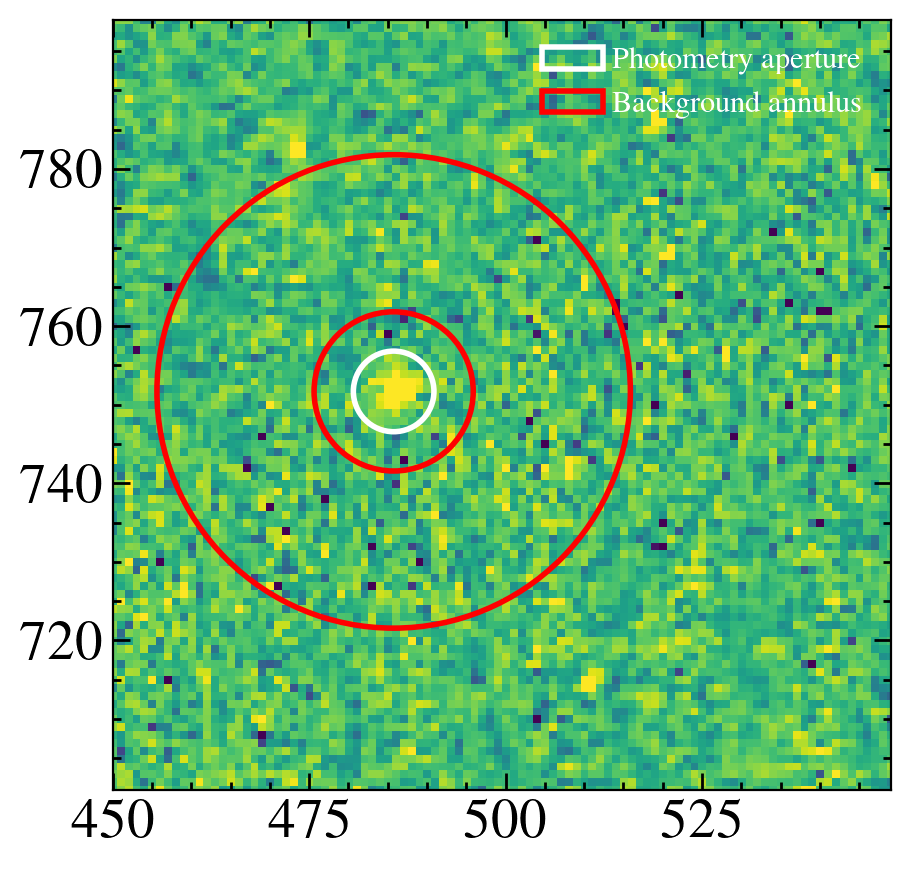

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05020_drc.fits
F280N
1770.0
   aperture_sum   
------------------
0.6058371986749238
4.100437381178831e-17 1.3445695047682707e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   485.8   751.7       0.6058           0.0185   0.04163              0.5642


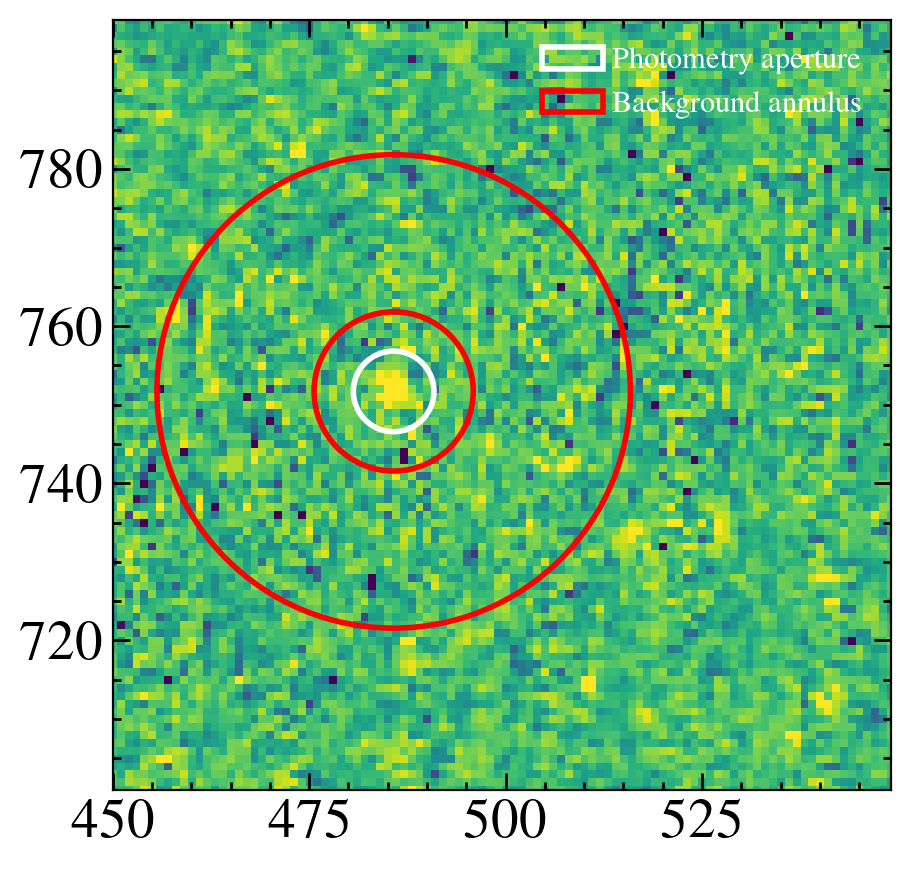

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05031_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.5744197917405767
3.379529141918932e-18 1.31584820555354e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   485.8   751.7       0.5744          0.02206  0.007758              0.5667


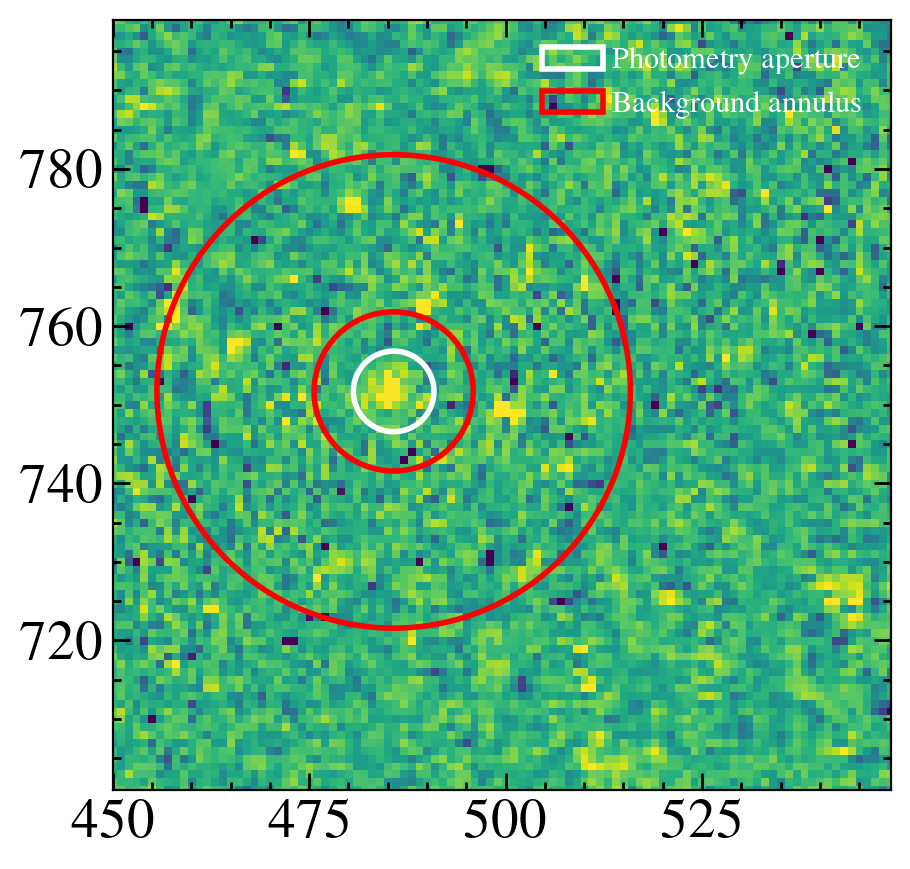

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05041_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.5026132817260722
2.953474964190718e-18 1.2308586650968665e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   485.8   751.7       0.5026          0.02064   0.00739              0.4952


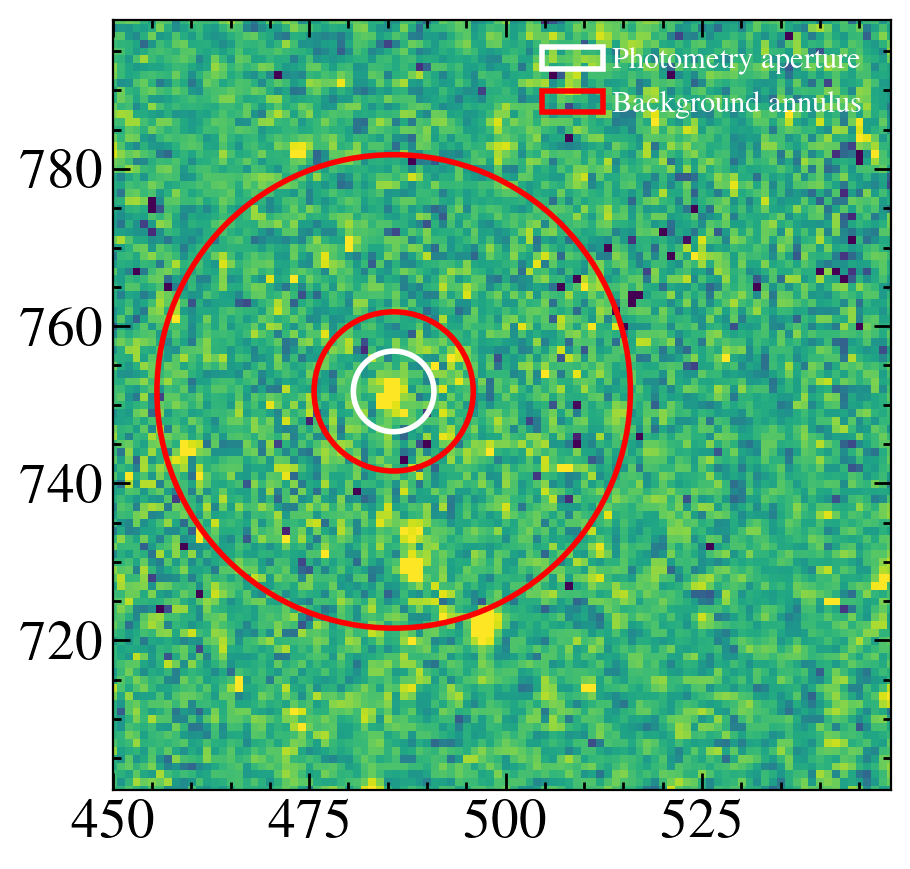

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05051_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.4035173133246206
2.2492091163438477e-18 1.1028651539700385e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   485.8   751.7       0.4035          0.01849   0.02638              0.3771


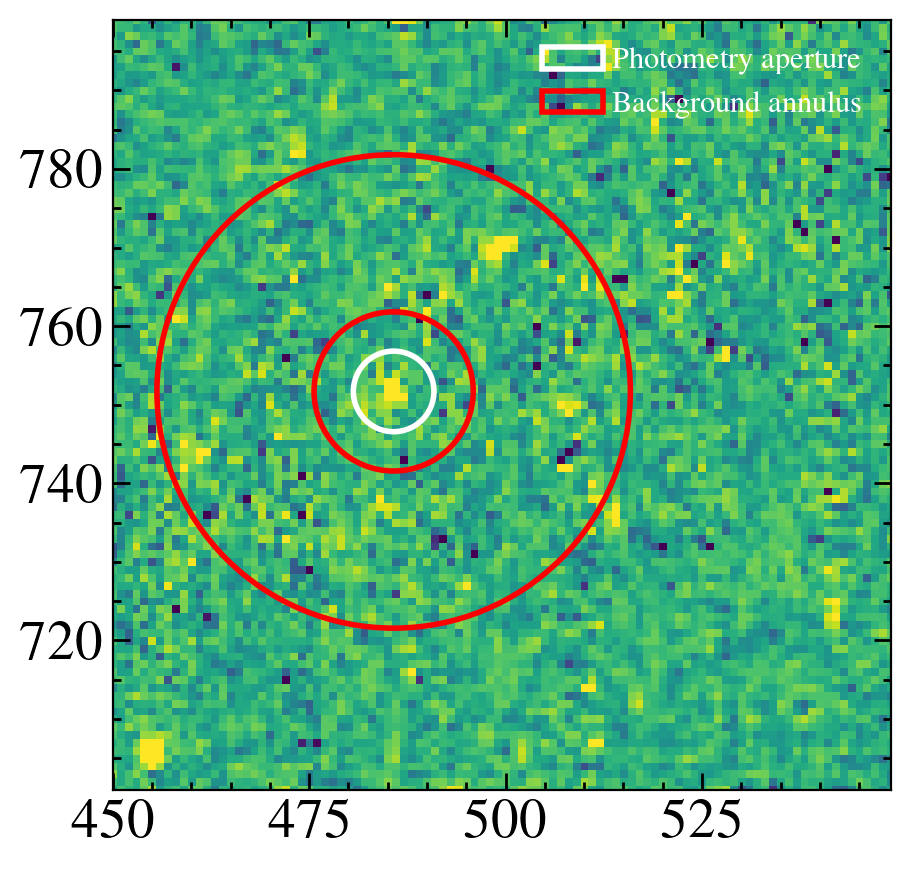

In [7]:
wfc3_pos = [(485.752, 751.70)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
for drc in drcs:
    print(drc)
    hdul = fits.open(drc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = np.nan_to_num(data, 0.0)
#     error = hdul[2].data
#     dq = hdul[3].data
#     mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(701, 799)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+25)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
    phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
    phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

In [8]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

In [9]:
0.4/0.039

10.256410256410257

In [10]:
340e-18*1.5

5.1e-16

In [11]:
mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/'

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
mask = (wn > 2300) & (wn < 3000)
wn, fn, en = wn[mask], fn[mask], en[mask]



['F275W', 'F280N', 'F225W', 'F225W', 'F225W'] [3.519845083771034e-18, 4.100437381178831e-17, 3.379529141918932e-18, 2.953474964190718e-18, 2.2492091163438477e-18] [9.062350411886832e-20, 1.3445695047682707e-18, 1.31584820555354e-19, 1.2308586650968665e-19, 1.1028651539700385e-19] [38.840311   30.49628425 25.68327507 23.99524046 20.39423504]


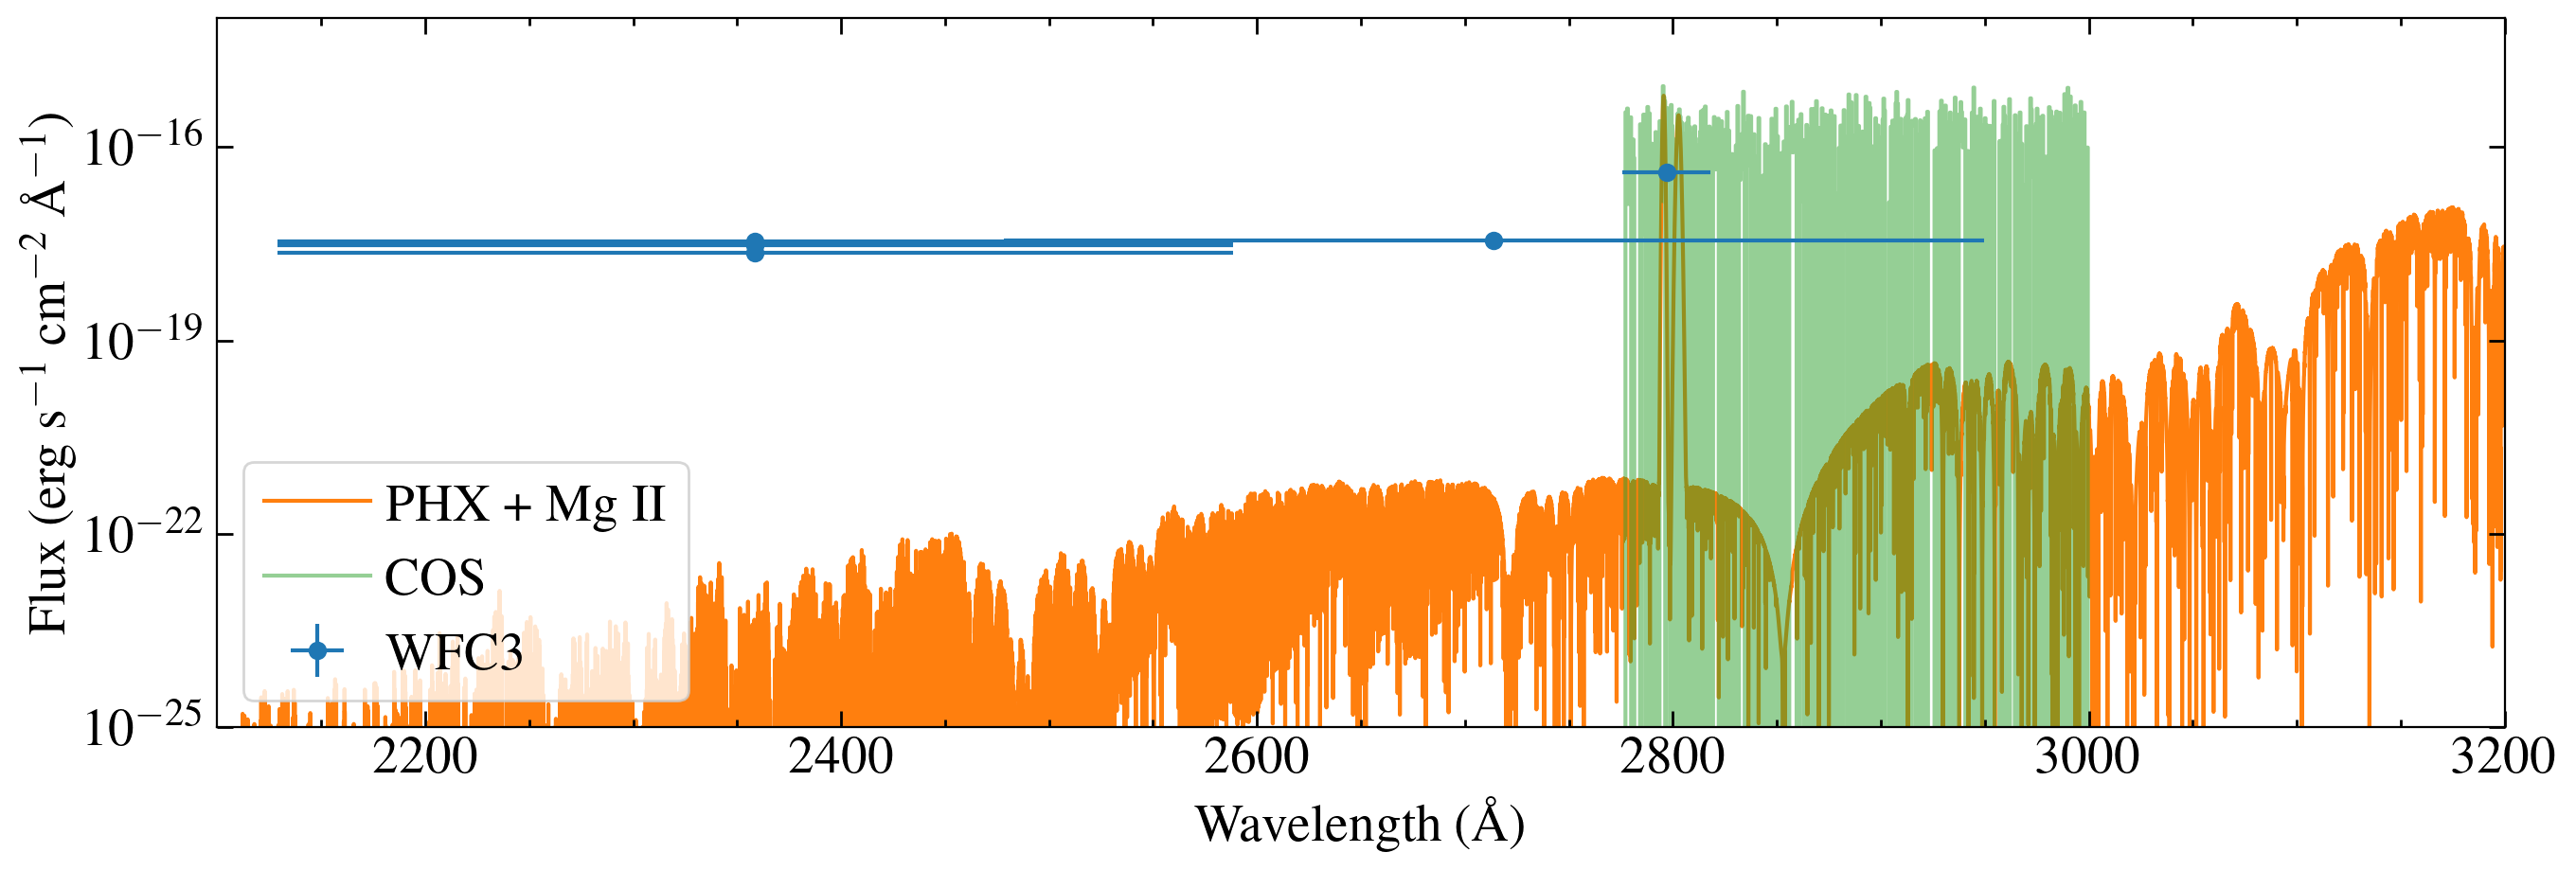

In [12]:
print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])
# bands = ['F275W', 'F280N', 'F225W']

fig, ax=plt.subplots()

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='PHX + Mg II')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, xerr=widths/2, marker='o', ls='none', label='WFC3', zorder=10, c='C0')
 
ax.legend(frameon=True, loc=3)
    
plt.yscale('log')
plt.ylim(1e-25, 1e-14)
plt.xlim(2100, 3200)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()



Need to integrate the model over the fliters so I'm sure it's not just the Mg II lines... pysynphot doesn't work for python 3.10, have to do it by hand.

In [13]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)

In [14]:
bands= glob.glob('filters/*UVIS*')
bands

['filters/HST_WFC3_UVIS2.F275W.dat',
 'filters/HST_WFC3_UVIS2.F225W.dat',
 'filters/HST_WFC3_UVIS2.F280N.dat']

In [15]:
phot_w = np.array([2713.86, 2358.7, 2796.94])
phot_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, f)
    phot_f.append(phot)
print(phot_f)

[1.791268145160082e-18, 1.5468124773685447e-19, 2.8340546061028076e-17]


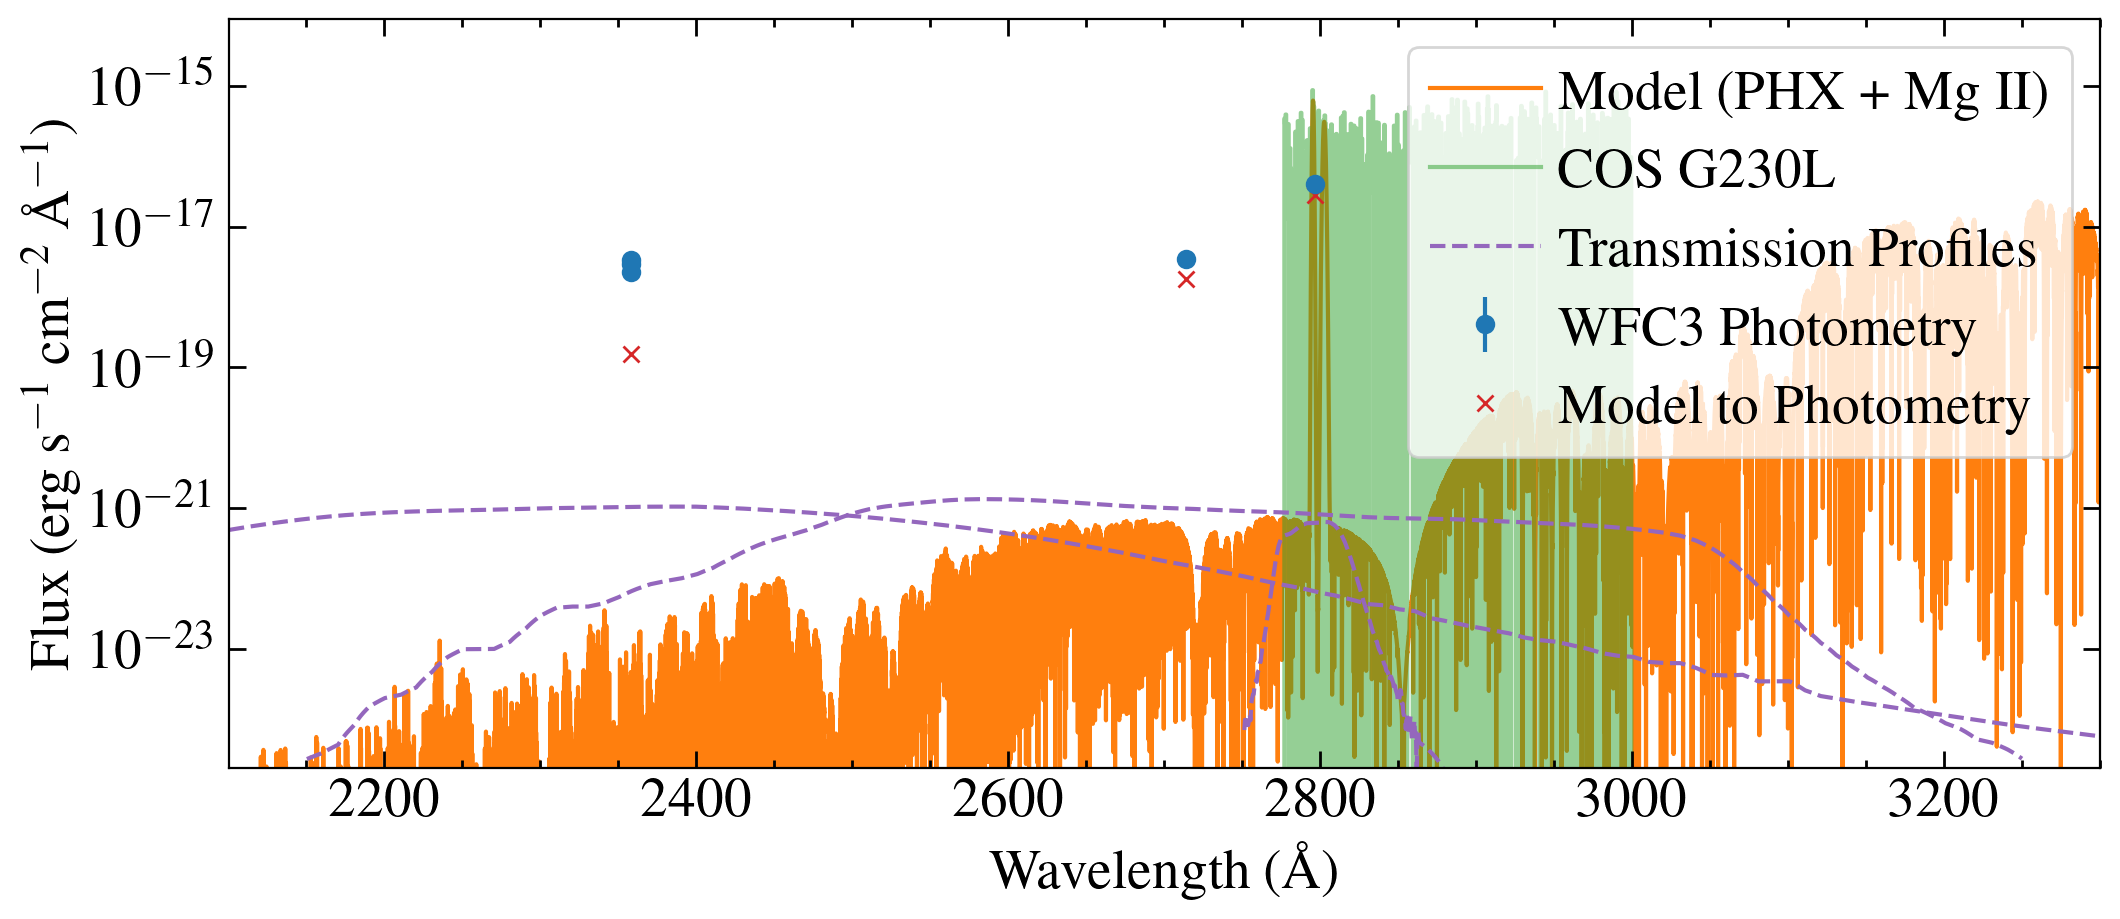

In [16]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])

fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')


# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2101, 3300)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')

Next step - work out the timings/subexposures of the photometry.

In [17]:


mids = (starts + ends) / 2
halfs = (mids - starts)*u.d.to(u.min)
mids0 = (mids-min(starts))*u.d.to(u.min)

<ErrorbarContainer object of 3 artists>

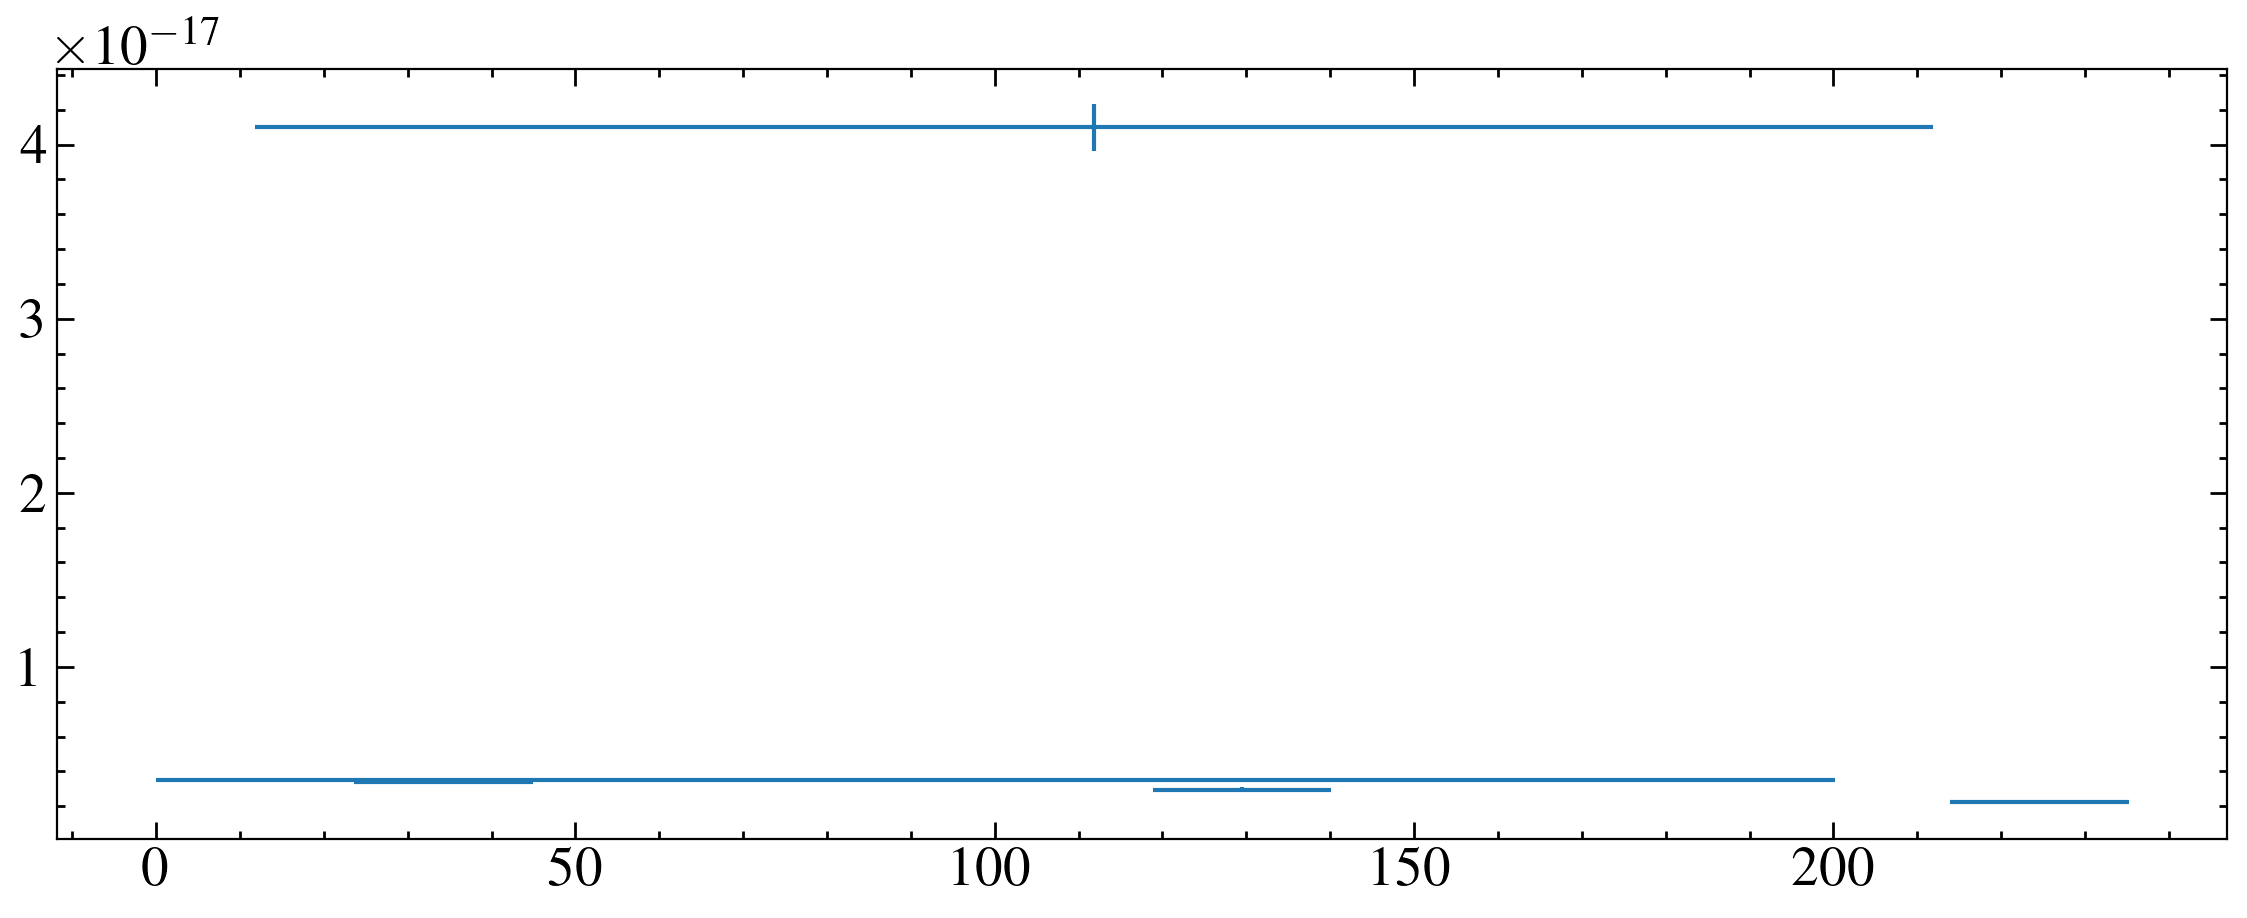

In [18]:
plt.errorbar(mids0, fluxes, yerr=flux_errs, xerr=halfs, ls='none')

All over the place? Look at individual flt images?

In [19]:
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits']

In [20]:
def make_PAMcorr_image_UVIS(data, scihdr, pamdir):
    """
    Corrects the geometric distortion of the input image
    data by multiplying by the correct UVIS PAM.
    Parameters
    ----------
    data : array
        Image data before correction.
    scihdr : header
        Header from science extension of data.
    pamdir : str
        Path to where pixel area maps for UVIS1 and/or
        UVIS2 are located.
    Returns
    -------
    pamcorr_data : array
        PAM-corrected data.
    """

    data = np.copy(data)
    x0 = int(np.abs(scihdr['LTV1']))
    y0 = int(np.abs(scihdr['LTV2']))
    x1 = int(x0 + scihdr['NAXIS1'])
    y1 = int(y0 + scihdr['NAXIS2'])
    

    if scihdr['CCDCHIP'] == 1:
        pam = fits.getdata(pamdir + 'UVIS1wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]

    elif scihdr['CCDCHIP'] == 2:
        pam = fits.getdata(pamdir + 'UVIS2wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]
    else:
        raise Exception('Chip case not handled.')

    return pamcorr_data

In [46]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flc in flcs:
    hdr = fits.getheader(flc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flcs)):
    print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

if3i05ddq F275W 60135.88636996 590.0
if3i05deq F280N 60135.89455292 590.0
if3i05dfq F225W 60135.9027707 590.0
if3i05dgq F225W 60135.91072181 590.0
if3i05dhq F275W 60135.95250441 590.0
if3i05diq F280N 60135.960687 590.0
if3i05djq F225W 60135.96890478 590.0
if3i05dkq F225W 60135.97685626 590.0
if3i05dpq F275W 60136.01853441 590.0
if3i05dtq F280N 60136.02671737 590.0
if3i05duq F225W 60136.03493478 590.0
if3i05dwq F225W 60136.04288626 590.0
2023-07-10 & WFC3/UVIS & F275W & 60135.88636996 & 590.0 & if3i05ddq & IF3I05010 \\
2023-07-10 & WFC3/UVIS & F280N & 60135.89455292 & 590.0 & if3i05deq & IF3I05020 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.9027707 & 590.0 & if3i05dfq & IF3I05030 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.91072181 & 590.0 & if3i05dgq & IF3I05030 \\
2023-07-10 & WFC3/UVIS & F275W & 60135.95250441 & 590.0 & if3i05dhq & IF3I05010 \\
2023-07-10 & WFC3/UVIS & F280N & 60135.960687 & 590.0 & if3i05diq & IF3I05020 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.96890478 & 590.0 & if3i05

Redoing photometry with flc files 

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits
F275W
590.0
   aperture_sum   
------------------
375.15191775711935
2.0959500020006406e-18 3.2644245583911803e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        375.2            46.56     76.19                 299


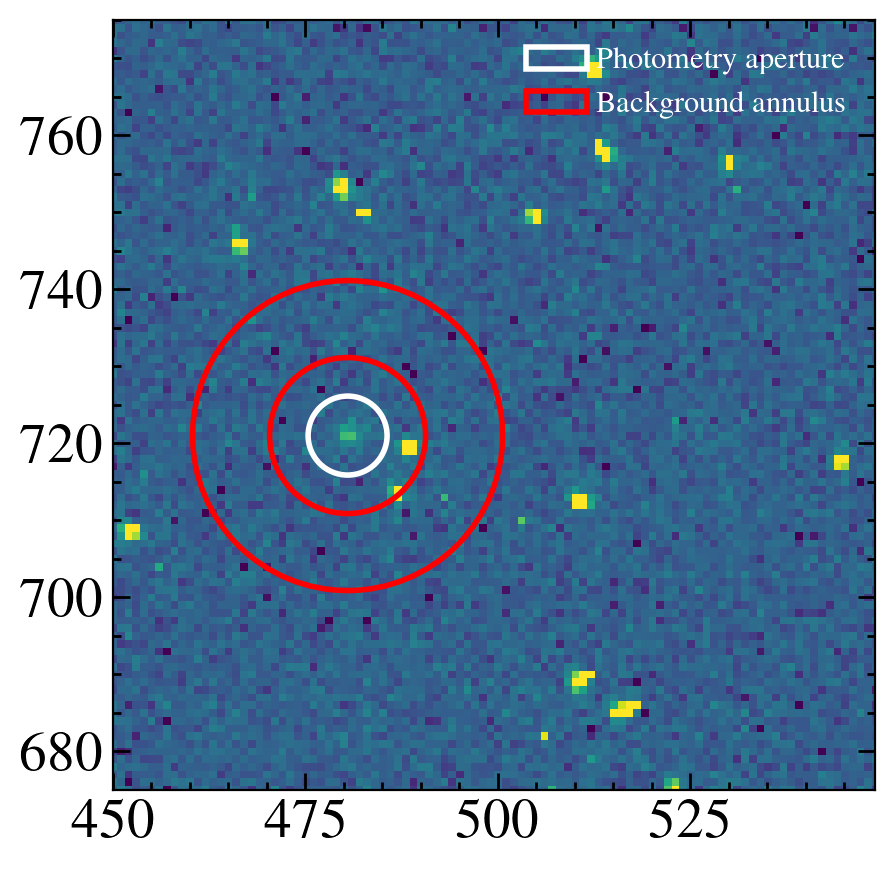

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits
F280N
590.0
   aperture_sum   
------------------
349.93691775047273
4.13230367775923e-17 5.6144181807952e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        349.9            45.58     14.47               335.5


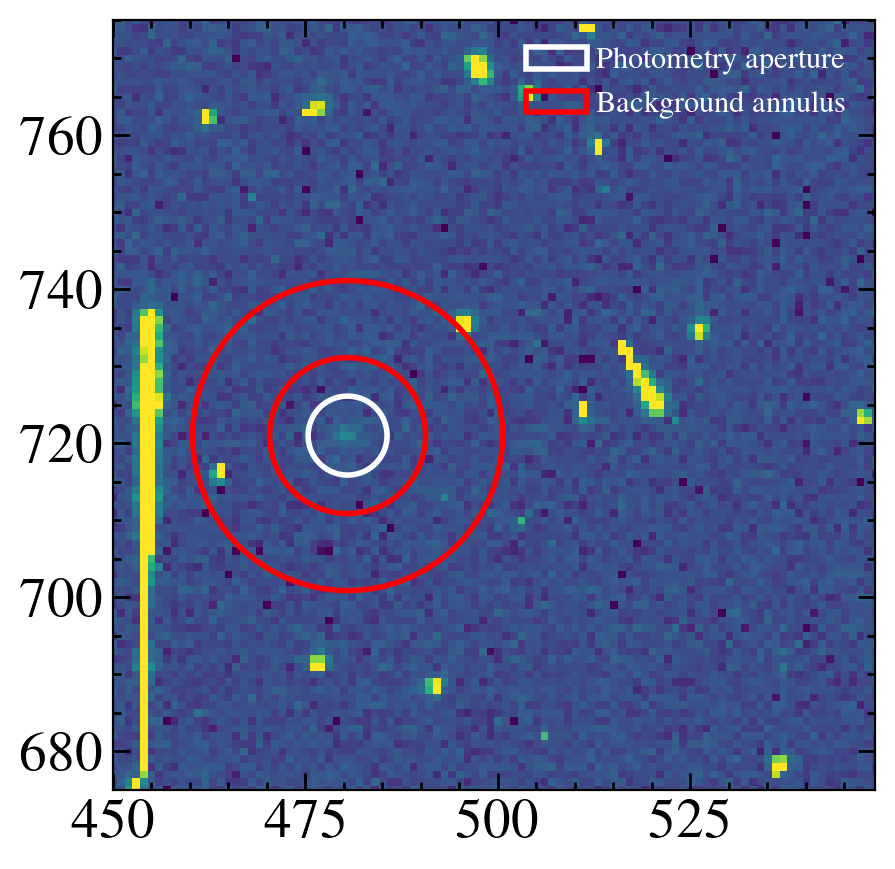

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits
F225W
590.0
   aperture_sum   
------------------
285.43941235467105
2.4779603303090754e-18 3.9890194314473226e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        285.4            39.46      40.3               245.1


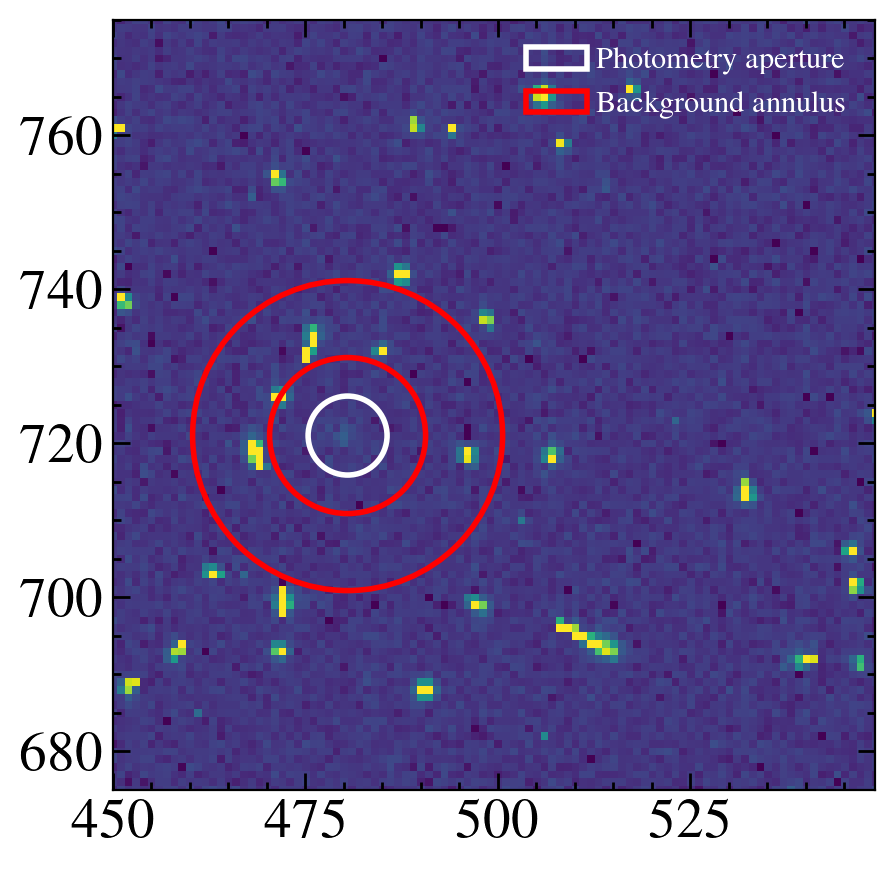

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
292.9003471995433
3.598648628688062e-18 3.9518692367630993e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        292.9             39.1    -63.11                 356


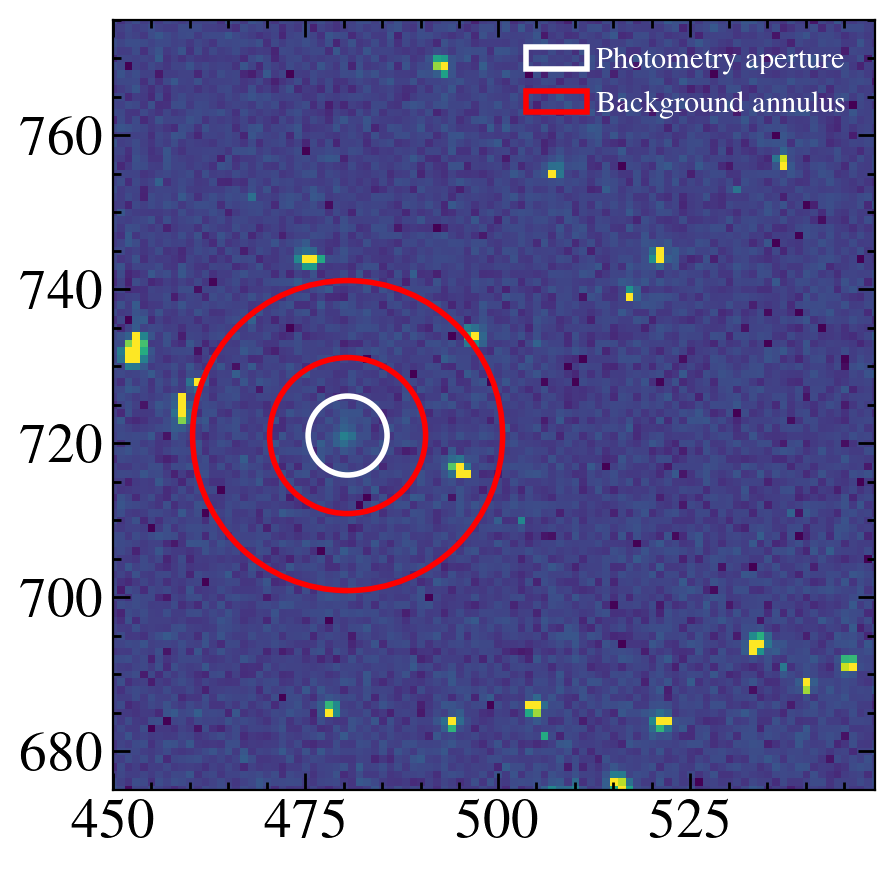

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits
F275W
590.0
  aperture_sum  
----------------
525.437599592904
3.68646249933023e-18 3.328197406291274e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        525.4            47.47   -0.3914               525.8


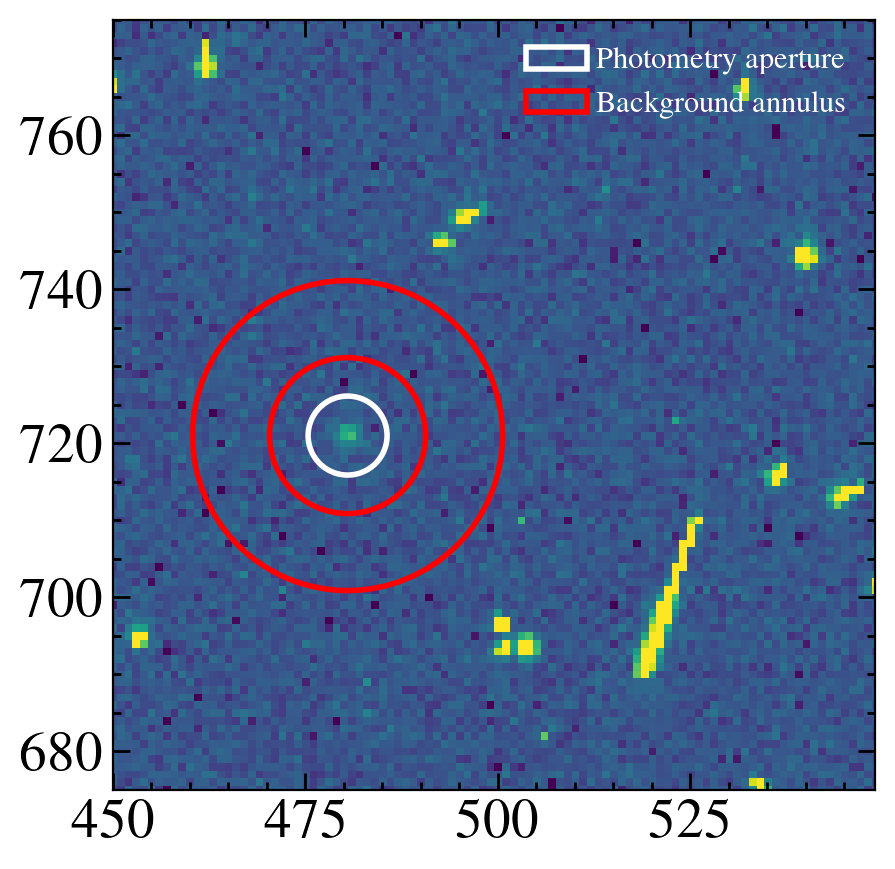

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
288.7440853083899
3.156968876149919e-17 5.51975199249912e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        288.7            44.81     32.45               256.3


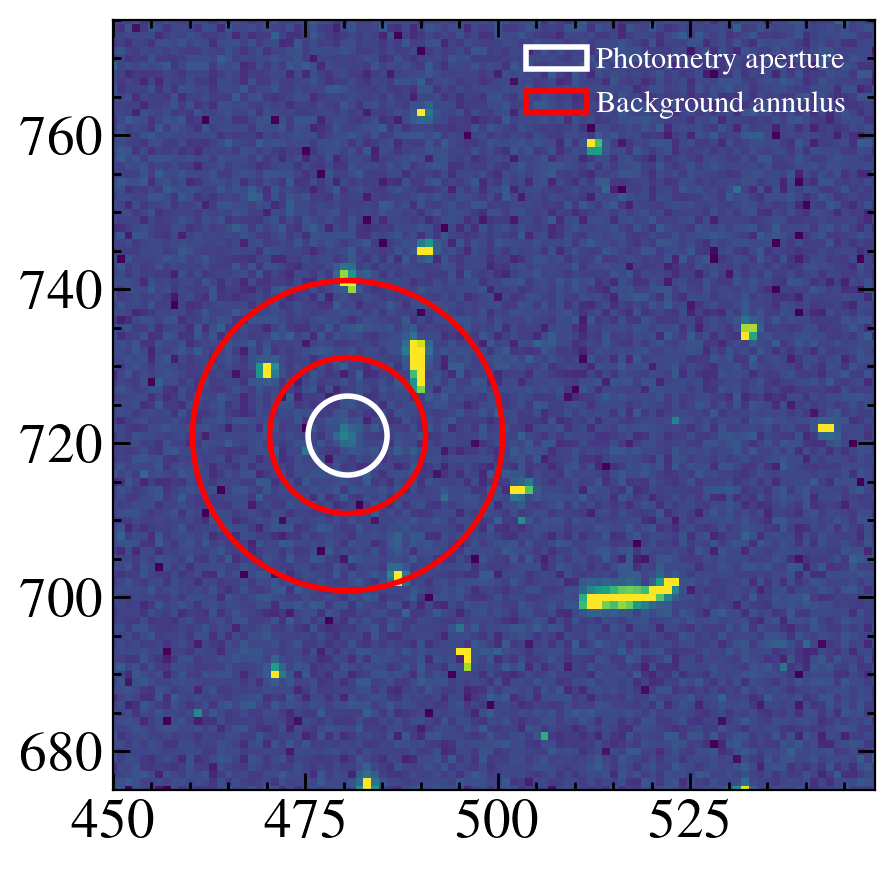

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits
F225W
590.0
   aperture_sum   
------------------
288.26030882921407
2.2245868781413097e-18 3.930624550289364e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        288.3            38.88     68.19               220.1


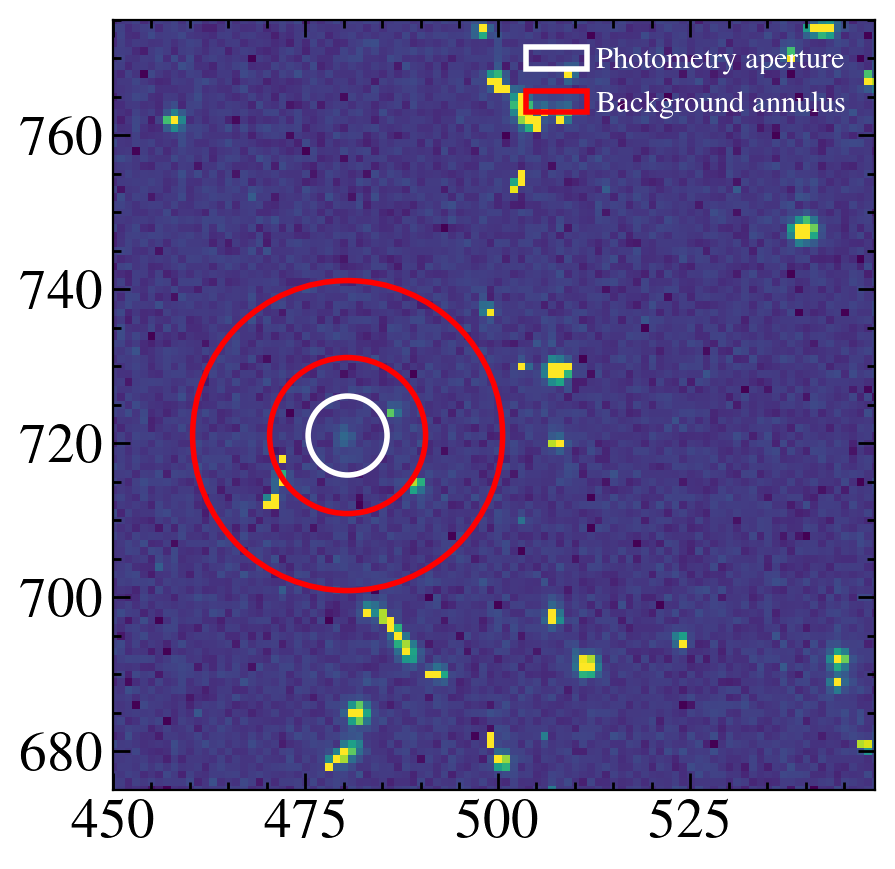

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
288.6563034767219
3.651527908548023e-18 3.9236529929576846e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        288.7            38.82    -72.58               361.2


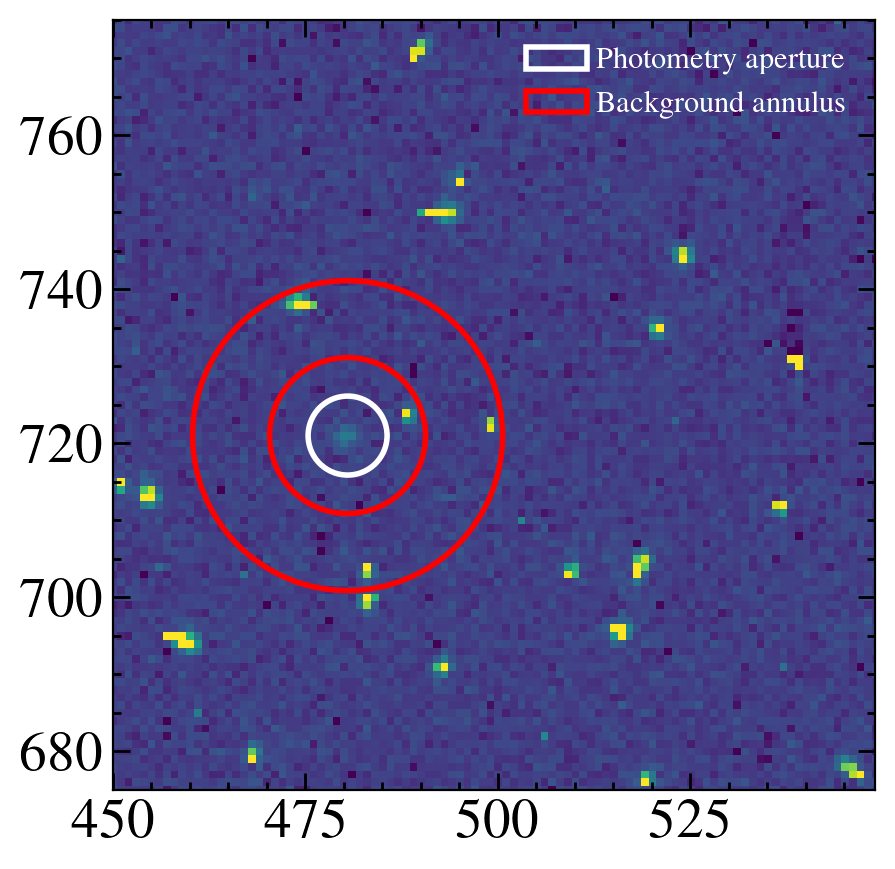

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
543.3323918316812
3.911172426908853e-18 3.372442142188656e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        543.3             48.1    -14.55               557.9


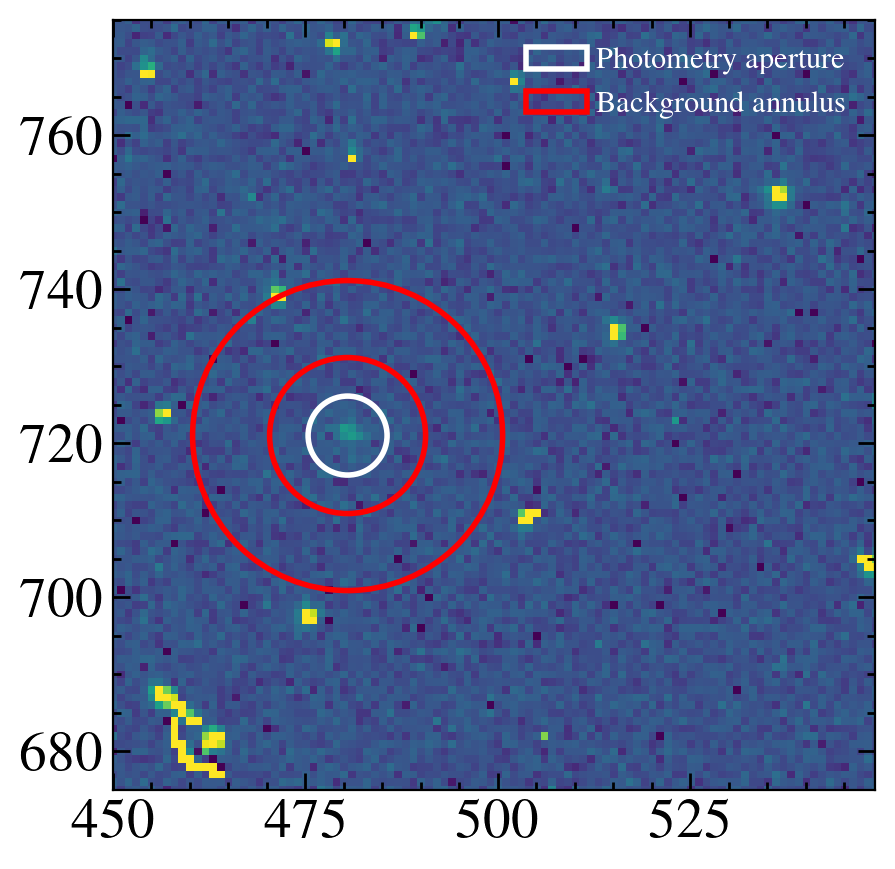

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
365.9812057194662
3.821684394096307e-17 5.566879557286959e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721          366            45.19     55.73               310.3


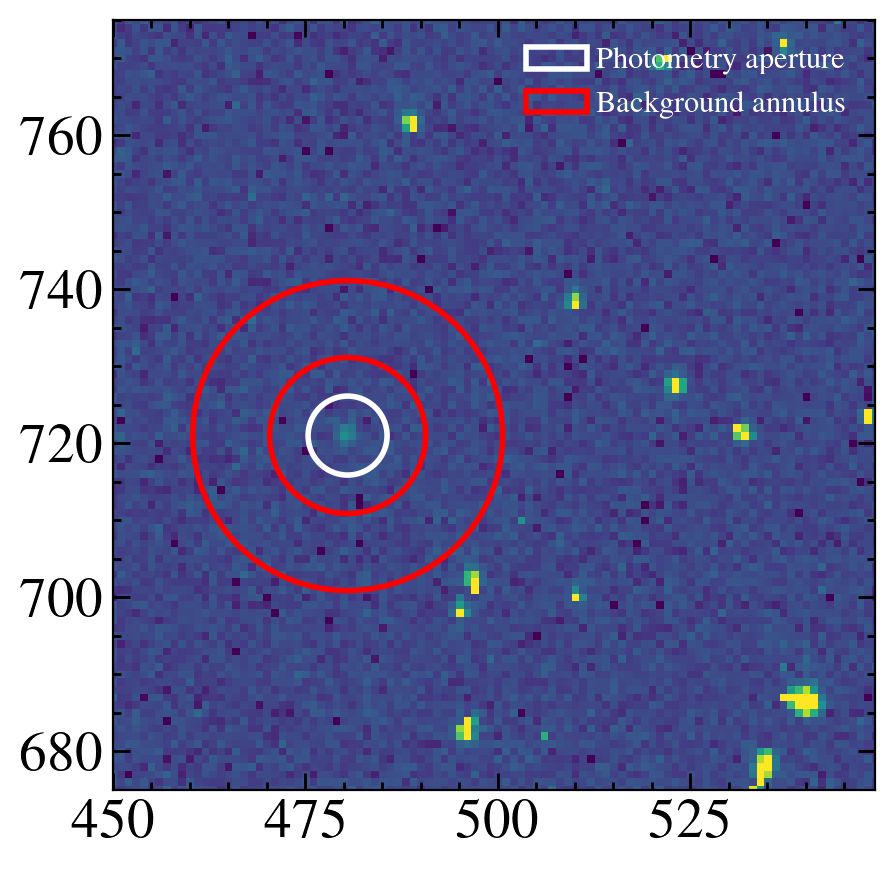

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
312.0592280643761
2.7364740832394437e-18 3.9775080753625227e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        312.1            39.35     41.35               270.7


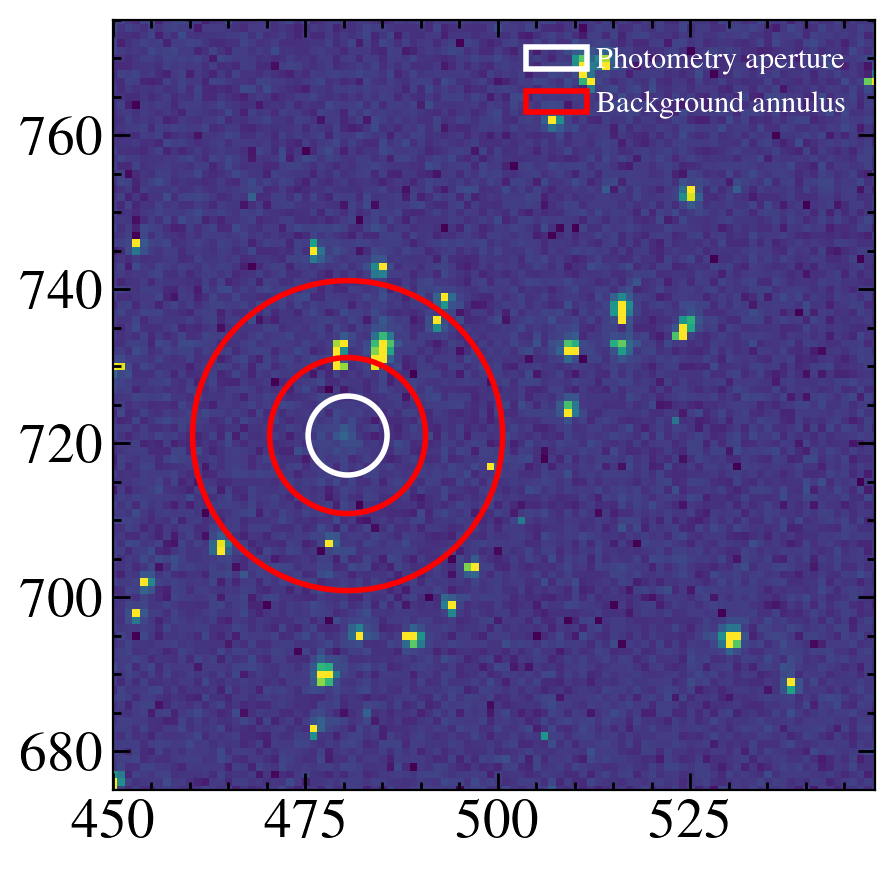

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits
F225W
590.0
   aperture_sum   
------------------
146.31818488208276
1.899287681041745e-18 3.768366016516821e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   480.5     721        146.3            37.28    -41.57               187.9


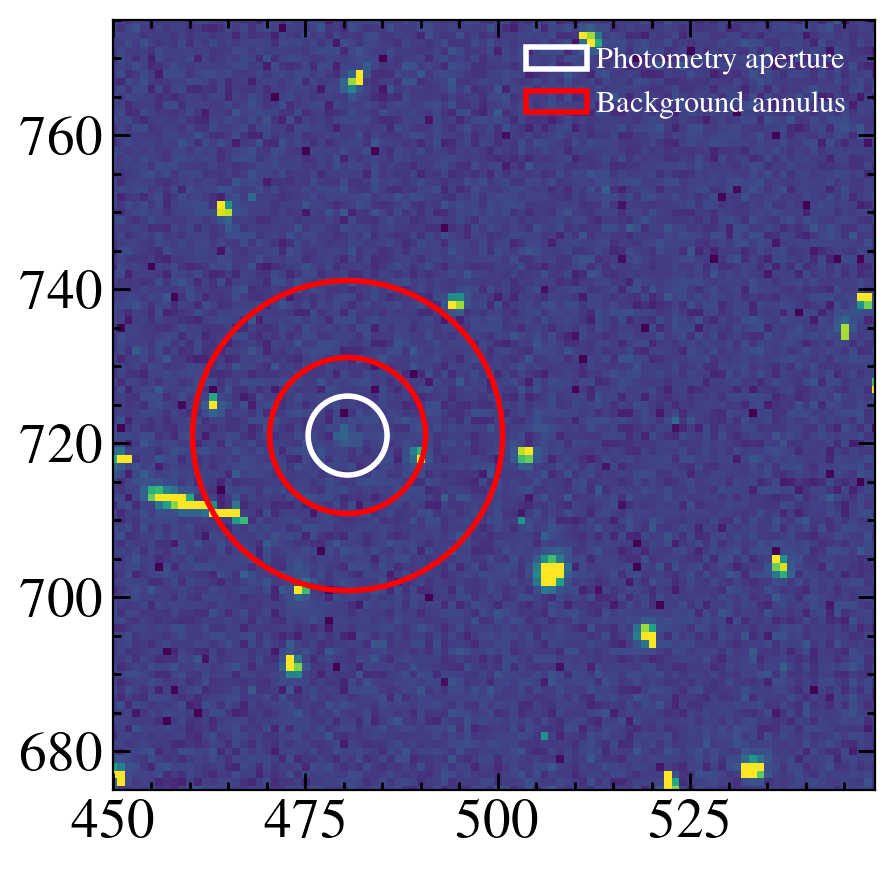

In [47]:
# wfc3_pos = [(489.752, 751.70)]
wfc3_pos = [(480.5, 721)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
flcsort = np.array(flcs)[args]
for flc in flcsort:
    print(flc)
    hdul = fits.open(flc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(675, 775)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip, mask = mask, error=error)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME'])
savdat.write('results/epoch{}_wfc3_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [45]:
# plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
# plt.y

In [24]:
# filters

Text(0, 0.5, 'Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \\AA$^{-1}$)')

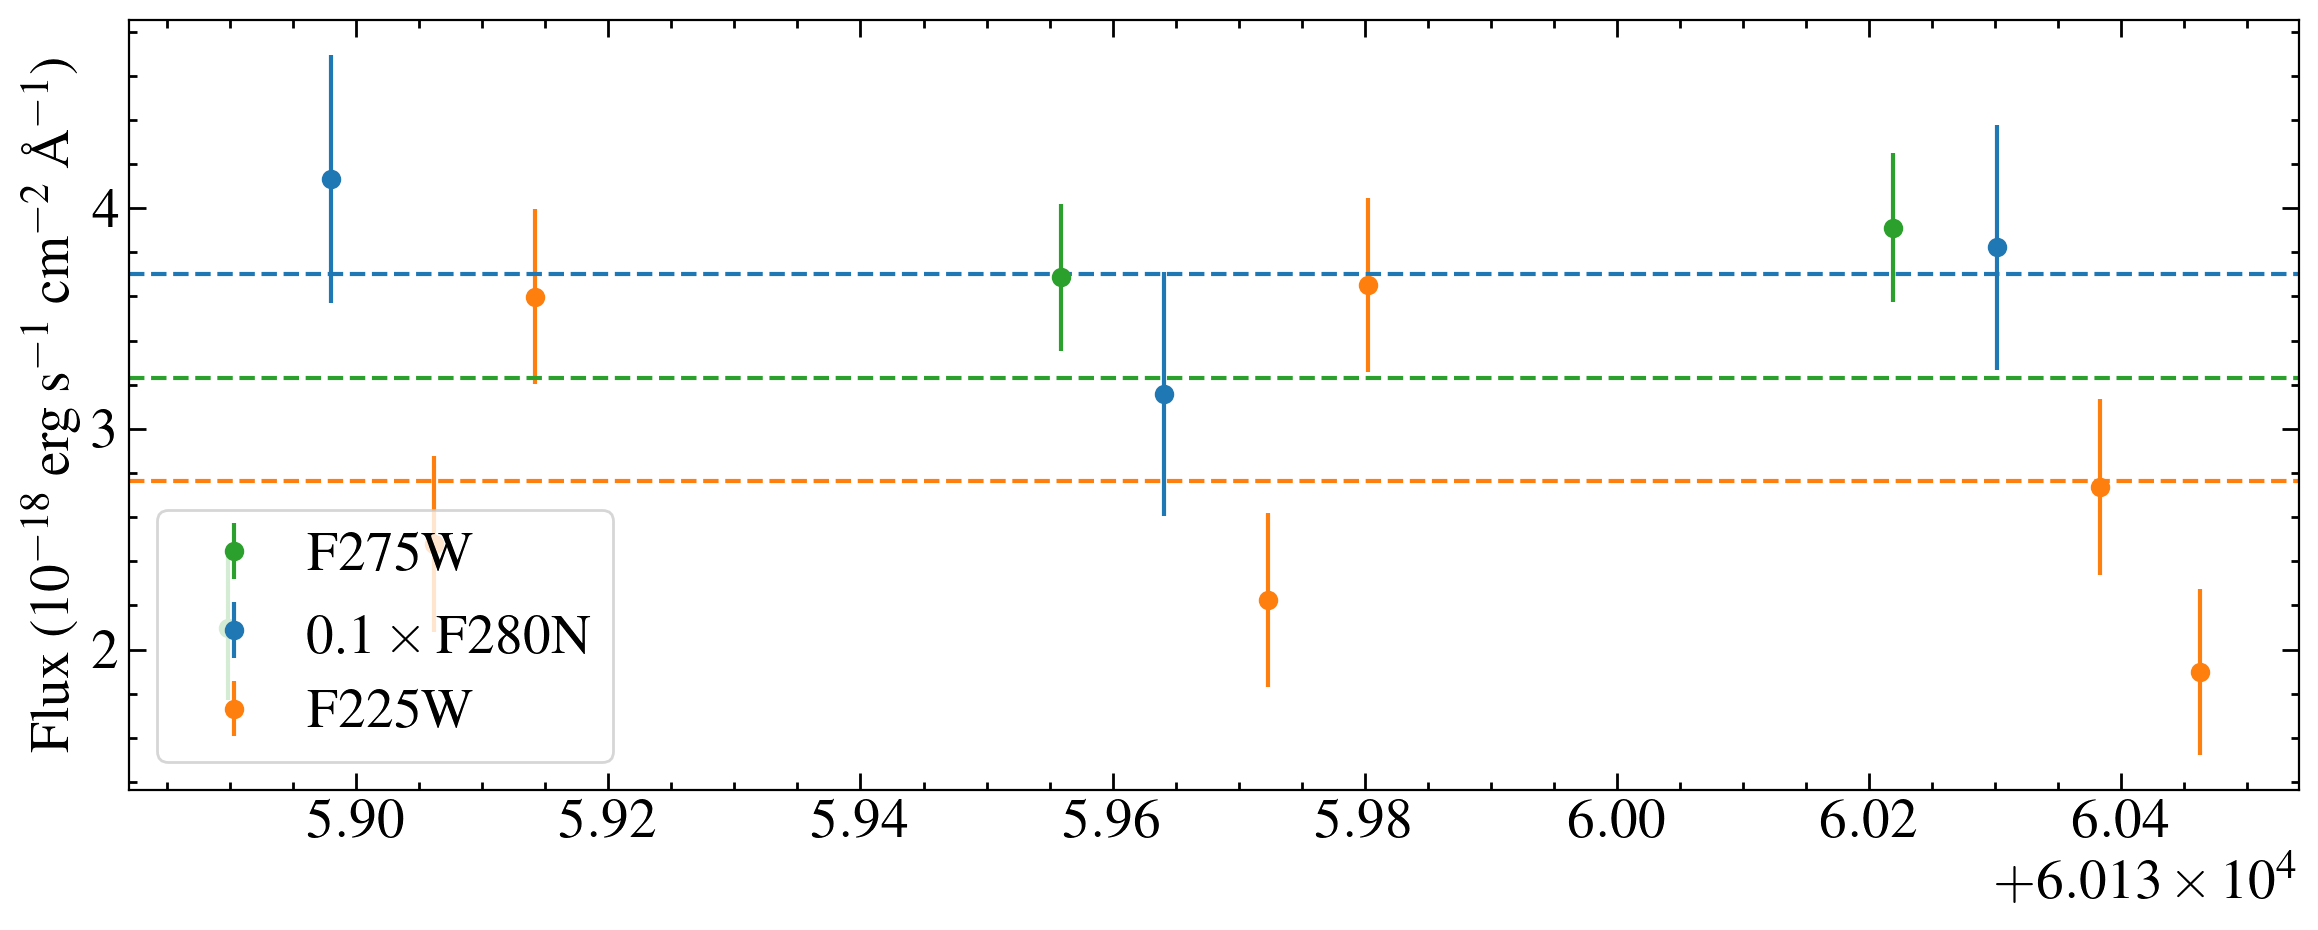

In [25]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, fluxes[i]*1e17, yerr=flux_errs[i]*1e17, ls='none',marker='o', c='C0', label=r'0.1\,$\times$\,F280N')
    elif filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C1', label='F225W')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C2', label='F275W')

plt.axhline(np.mean(f280n), ls='--', c='C0')
plt.axhline(np.mean(f225w), ls='--', c='C1')
plt.axhline(np.mean(f275w), ls='--', c='C2')

# plt.axhline(np.median(f280n), ls='-.', c='C0')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_ylabel('Time (MJD)')
ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

In [26]:
for i in range(len(starts)):
    print(filters[i], fluxes[i], flux_errs[i],  fluxes[i]/flux_errs[i])

F275W 2.0959500020006406e-18 3.2644245583911803e-19 6.420580302929703
F280N 4.13230367775923e-17 5.6144181807952e-18 7.360163679816863
F225W 2.4779603303090754e-18 3.9890194314473226e-19 6.21195352114393
F225W 3.598648628688062e-18 3.9518692367630993e-19 9.106193583560083
F275W 3.68646249933023e-18 3.328197406291274e-19 11.076453855656908
F280N 3.156968876149919e-17 5.51975199249912e-18 5.719403481243314
F225W 2.2245868781413097e-18 3.930624550289364e-19 5.659626987211333
F225W 3.651527908548023e-18 3.9236529929576846e-19 9.306449665915713
F275W 3.911172426908853e-18 3.372442142188656e-19 11.597448561031712
F280N 3.821684394096307e-17 5.566879557286959e-18 6.865038761425656
F225W 2.7364740832394437e-18 3.9775080753625227e-19 6.879870590809631
F225W 1.899287681041745e-18 3.768366016516821e-19 5.040082817638017


In [27]:
np.array(fluxes)/flux_errs

array([ 6.4205803 ,  7.36016368,  6.21195352,  9.10619358, 11.07645386,
        5.71940348,  5.65962699,  9.30644967, 11.59744856,  6.86503876,
        6.87987059,  5.04008282])

In [28]:
300*u.ks.to(u.d)

3.472222222222222

I should really try to look at ACS...

In [29]:
apath

'/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/'

In [30]:
drzs = glob.glob('{}*drz.fits'.format(apath))
drzs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06021_drz.fits']

In [31]:
roots = []
bands = []
times = []
expt = []
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
roots, bands, times, expt = np.array(roots), np.array(bands), np.array(times), np.array(expt)    
args = np.argsort(times)
roots, bands, times, expt = roots[args], bands[args], times[args], expt[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

jf3i06011 F150LP 60136.81131282 2600.0
jf3i06021 F165LP 60136.87722764 2600.0


[None, None]

In [32]:
flts = glob.glob('{}*flt.fits'.format(apath))
flts


['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hvq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hwq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hxq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hyq_flt.fits']

In [33]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flt in flts:
    hdr = fits.getheader(flt, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flts)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i06hvq F150LP 60136.81131282 1300.0
jf3i06hwq F150LP 60136.82682208 1300.0
jf3i06hxq F165LP 60136.87722764 1300.0
jf3i06hyq F165LP 60136.89273727 1300.0
2023-07-11 & ACS/SBC & F150LP & 60136.81131282 & 1300.0 & jf3i06hvq & JF3I06010 \\
2023-07-11 & ACS/SBC & F150LP & 60136.82682208 & 1300.0 & jf3i06hwq & JF3I06010 \\
2023-07-11 & ACS/SBC & F165LP & 60136.87722764 & 1300.0 & jf3i06hxq & JF3I06020 \\
2023-07-11 & ACS/SBC & F165LP & 60136.89273727 & 1300.0 & jf3i06hyq & JF3I06020 \\


/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hvq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
24.89538025856018
1.0397528459958266e-18 5.968134655599049e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660         24.9            14.29         0                24.9


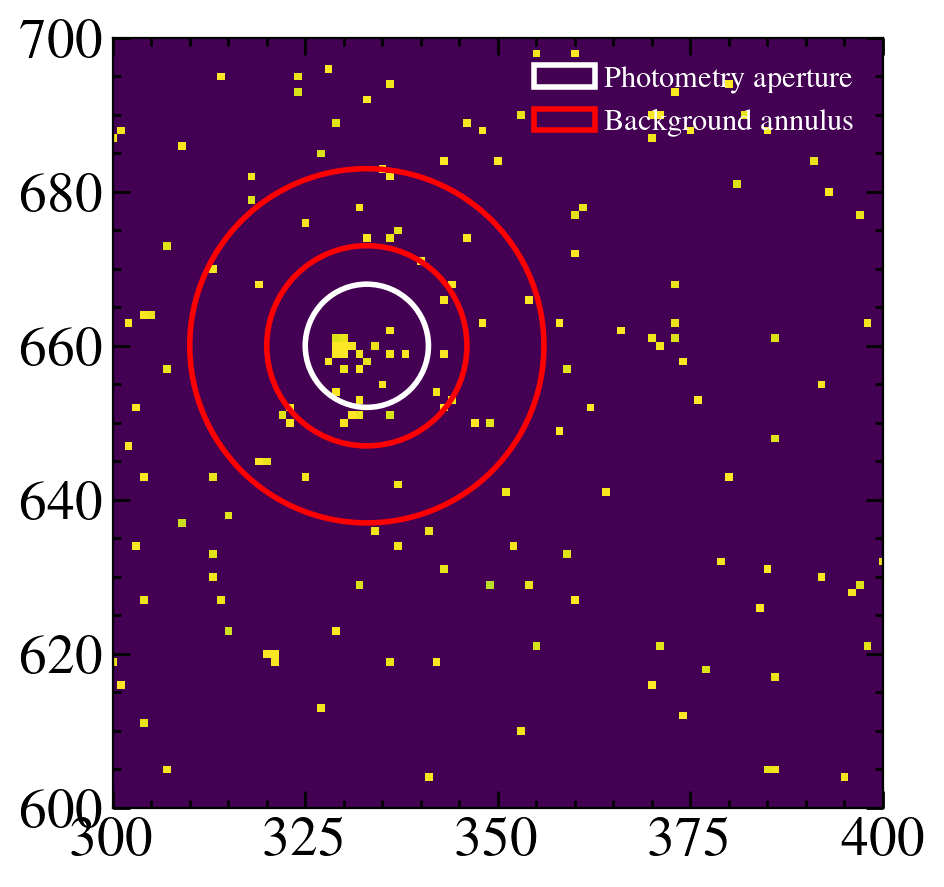

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hwq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
29.51359978178776
1.2326322815713599e-18 6.016144536419135e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        29.51             14.4         0               29.51


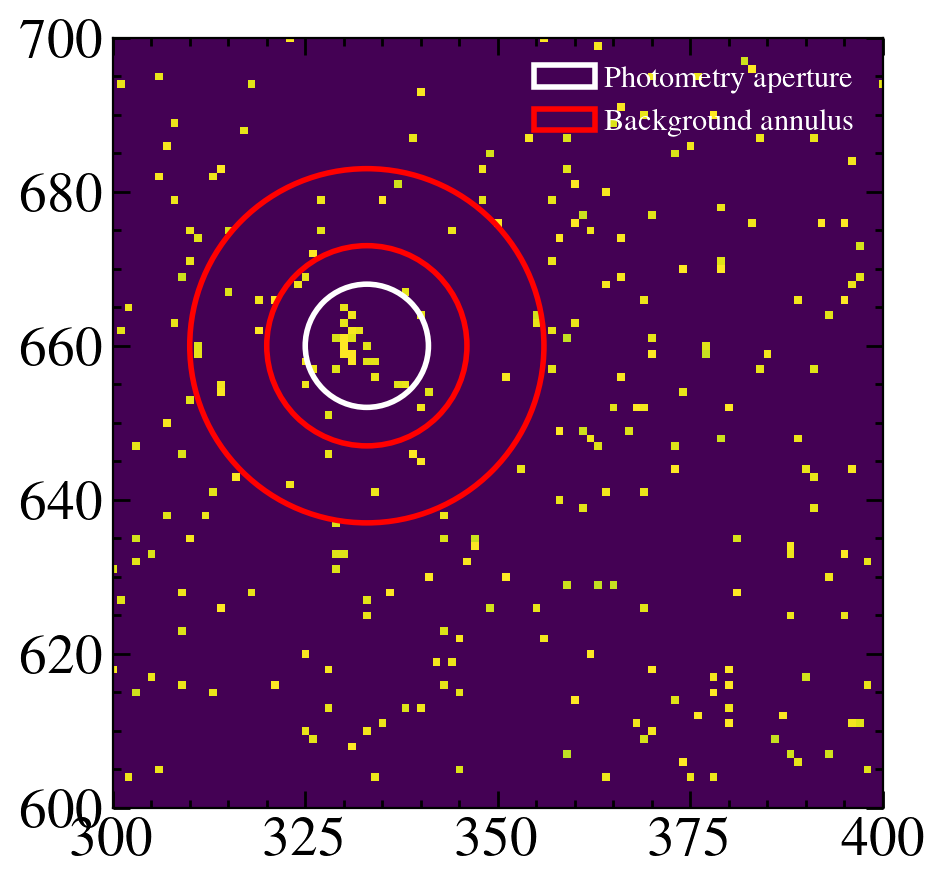

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hxq_flt.fits
F165LP
1300.0
   aperture_sum  
-----------------
6.612265212345163
9.43059731976266e-19 2.00365045832498e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        6.612            14.05         0               6.612


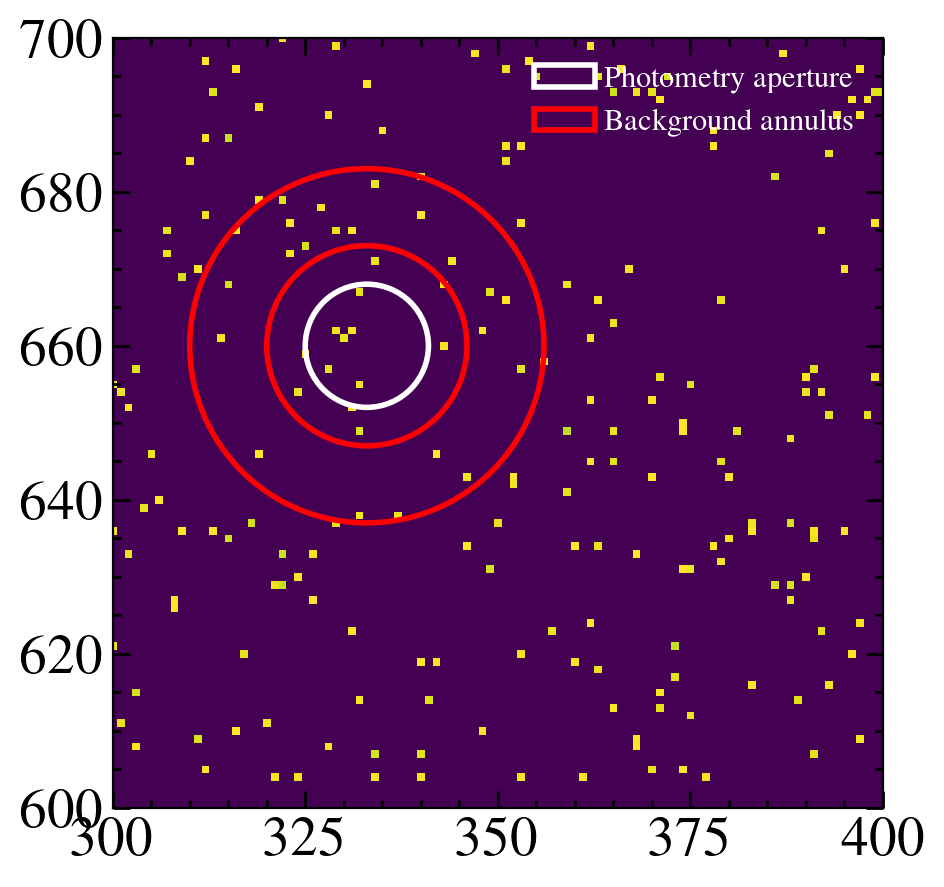

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hyq_flt.fits
F165LP
1300.0
   aperture_sum   
------------------
13.209915368403829
1.88403502380657e-18 2.0134485086816864e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        13.21            14.12         0               13.21


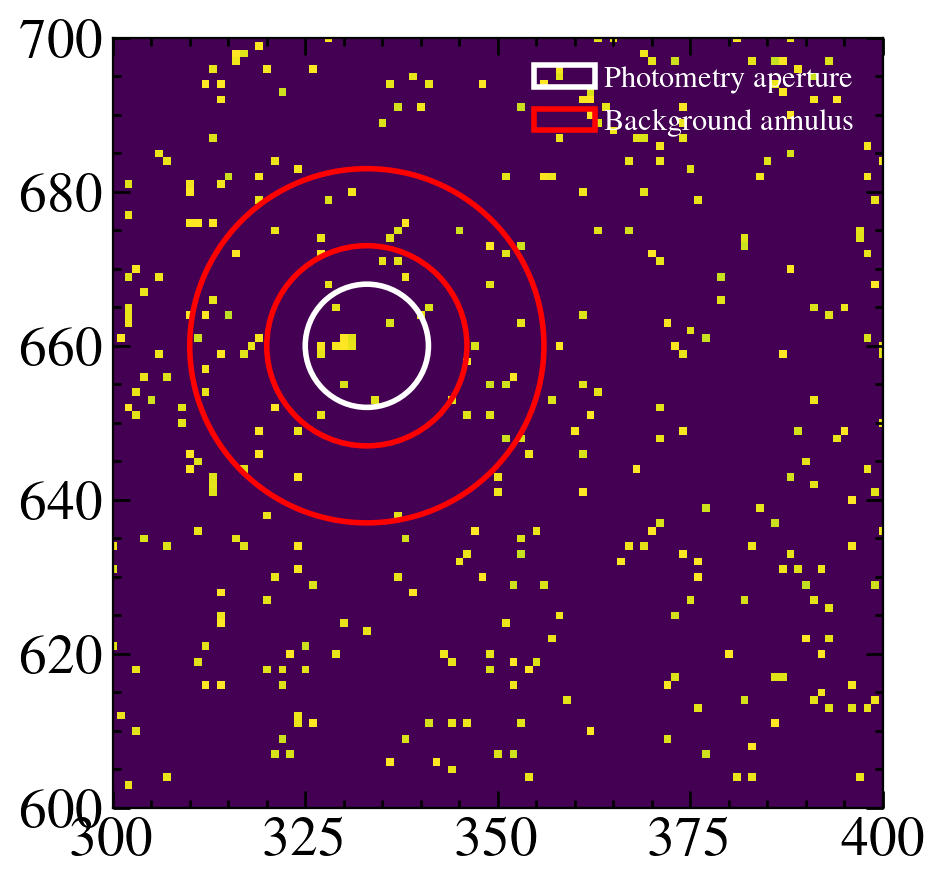

In [34]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(333, 660)]
pixscale = 0.025
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
fltsort = np.array(flts)[args]
for flt in fltsort:
    print(flt)
    hdul = fits.open(flt)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(300, 400)
    plt.ylim(600, 700)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
#     ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
    ee = 0.65
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

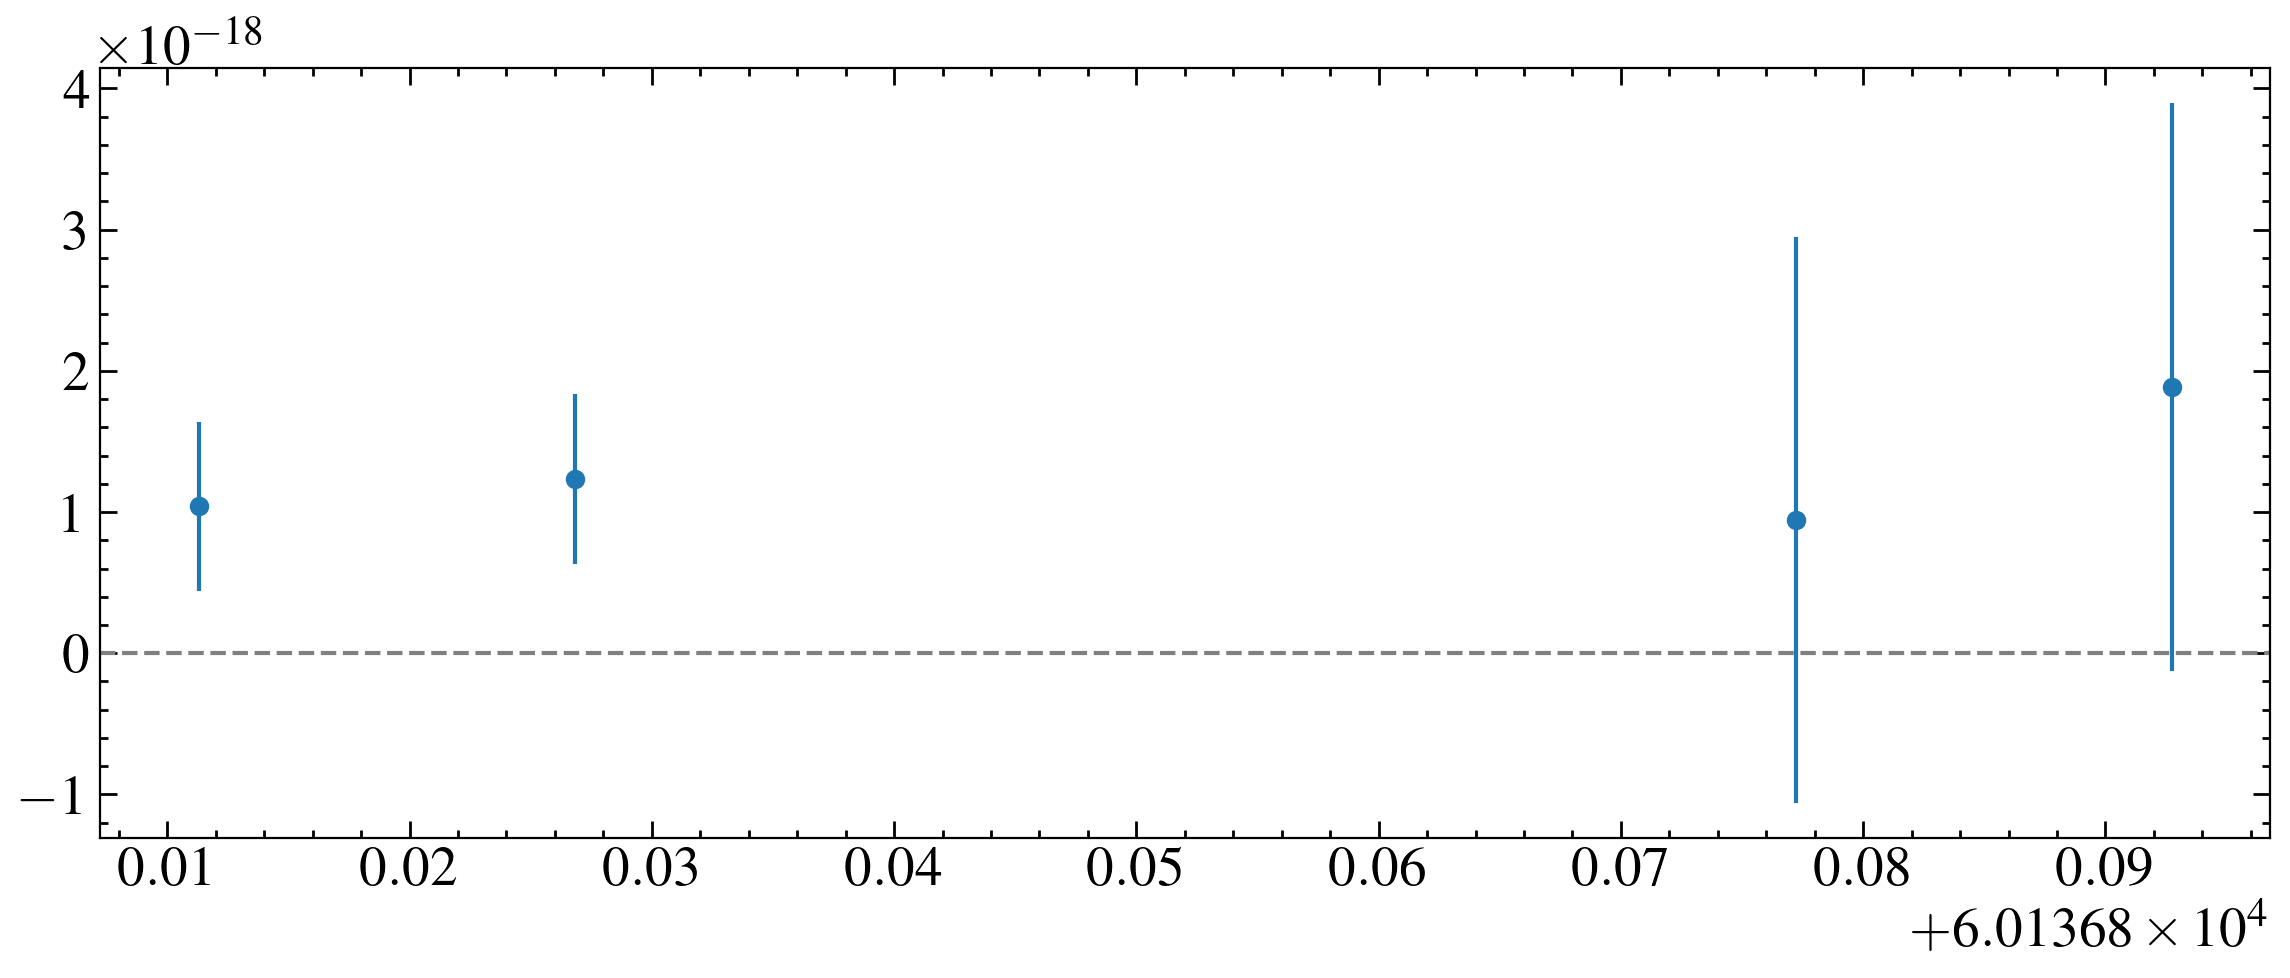

In [35]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

Ok so we use the drz images...

In [36]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(drzs)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i06011 F150LP 60136.81131282 2600.0
jf3i06021 F165LP 60136.87722764 2600.0
2023-07-11 & ACS/SBC & F150LP & 60136.81131282 & 2600.0 & jf3i06011 & jf3i06011 \\
2023-07-11 & ACS/SBC & F165LP & 60136.87722764 & 2600.0 & jf3i06021 & jf3i06021 \\


/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06011_drz.fits
F150LP
2600.0
    aperture_sum   
-------------------
0.03811026963366871
1.8810660368693573e-18 1.8897152213395699e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830      0.03811         0.003829         0             0.03811


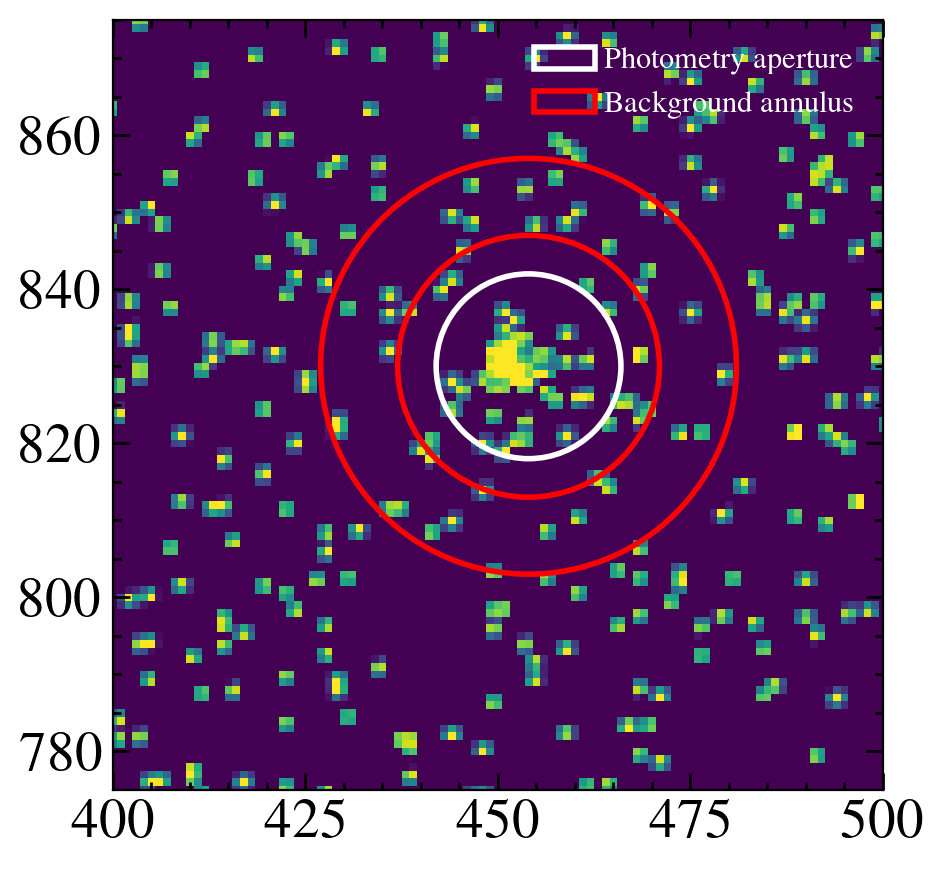

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06021_drz.fits
F165LP
2600.0
    aperture_sum    
--------------------
0.013860310409902724
2.3727170071598625e-18 3.952508299570317e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830      0.01386         0.002309         0             0.01386


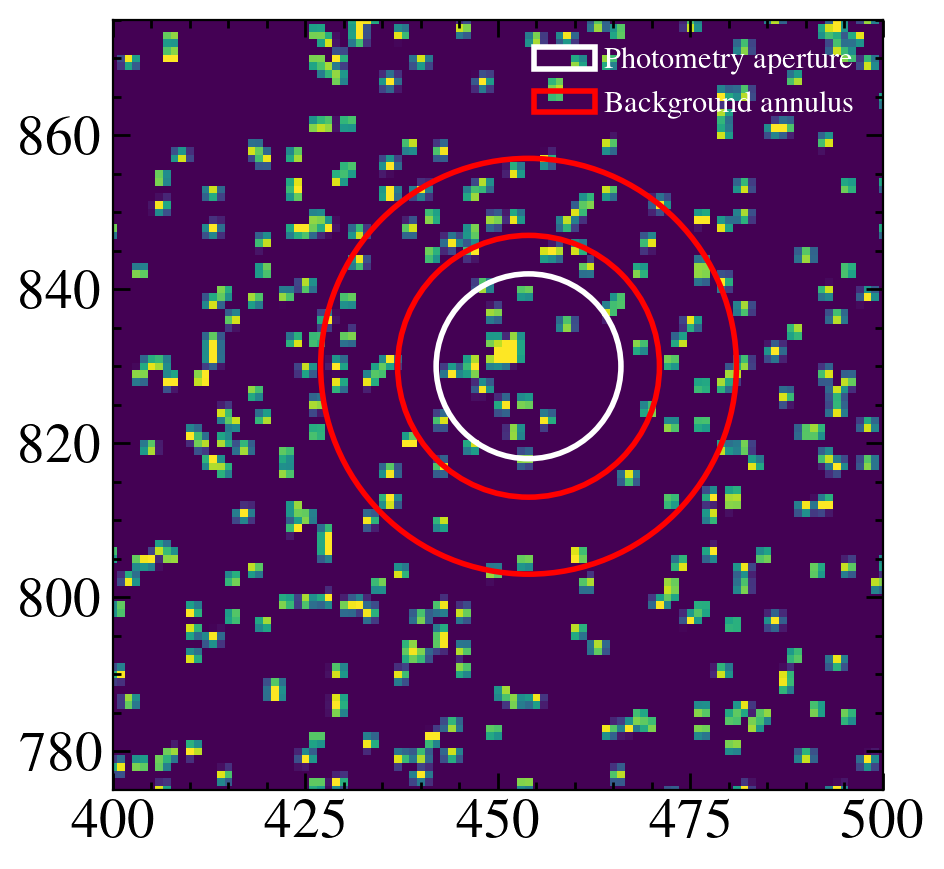

In [37]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(454, 830)]
pixscale = 0.025
ap_arc = '0.30' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
# fltsort = np.array(flts)[args]
for drz in drzs:
    print(drz)
    hdul = fits.open(drz)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
#     mask = dq != 0
    error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(400, 500)
    plt.ylim(775, 875)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error)#, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    if filt =='F150LP':
        ee = 0.715
    if filt == 'F165LP':
        ee = 0.704
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / ee 
    flux_err = phot_table['aperture_sum_err'][0]* photflam / ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)


savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME'])
savdat.write('results/epoch{}_acs_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

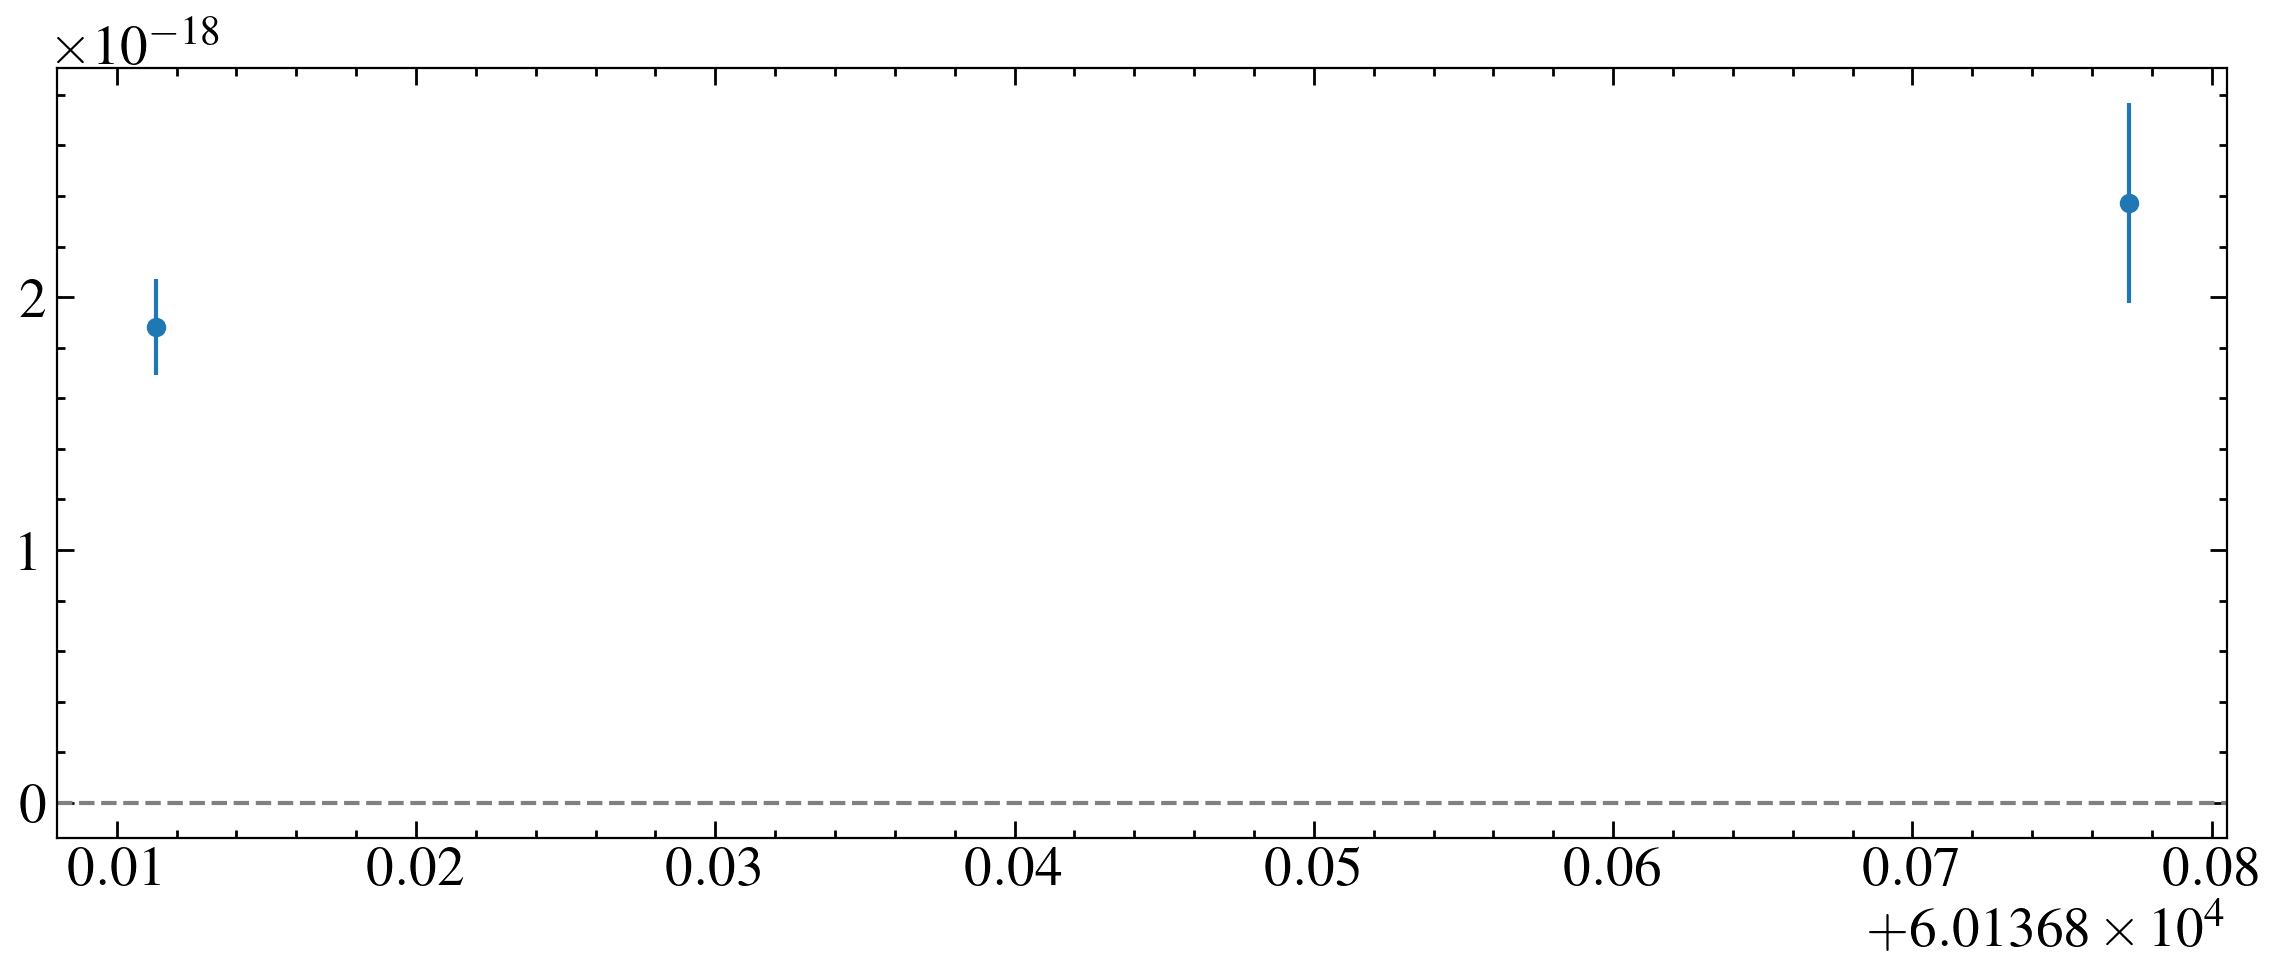

In [38]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

In [39]:
(0.696+0.701+0.715)/3

0.7039999999999998